# Introdução à Ciência de Dados

## Análise textual

### 1. Atividade avaliada

#### 1.a. Escolher um corpus de textos para realizar as atividades:
O Corpus escolhido foi uma coleção de 15 artigos científicos (*.pdf) sobre Ontologias.

**Obs.:** *Outros detalhes dos artigos estão diponíveis no arquivo "lista.txt".*

[ont01.pdf](http://eprints.hud.ac.uk/17545/)  = **A Generic Model of Ontology to Visualize Information Science Domain(OIS)** 

[ont02.pdf](https://www.researchgate.net/publication/310017720)  = **Data-driven Ontology evaluation based on competency questions: a study in the agricultural domain** 

[ont03.pdf](https://www.researchgate.net/publication/335061566)  = **Ontology of Intelligence Preprint** 

[ont04.pdf](https://www.researchgate.net/publication/247935724)  = **On Algebraic Spectrum of Ontology Evaluation** 

*ont05.pdf*  **removido** 

[ont06.pdf](https://www.researchgate.net/publication/320215614)  = **Tesauro: um tipo de ontologia Presentation** 

[ont07.pdf](https://klevas.mif.vu.lt/~donatas/Vadovavimas/Temos/ontologiskaiTeisingasKoncepcinisModeliavimas/papildoma/Guarino98\-Formal%20Ontology%20and%20Information%20Systems.pdf) = **Formal Ontology in Information Systems** 

[ont08.pdf](https://www.researchgate.net/publication/230771114)  = **Ontological Engineering: With Examples from the Areas of Knowledge Management** 

[ont09.pdf](https://www.researchgate.net/publication/221024668)  = **Ontologies Come of Age** 

[ont10.pdf](https://www.researchgate.net/publication/332275872)  = **OntoM4IS+: Ontology Reuse Method for Information Science** 

[ont11.pdf](https://www.researchgate.net/publication/273062391)  = **Practicing an (Ontology spectrum for geological data interoperability** 

[ont12.pdf](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3002-3)  = **ROBOT: A Tool for Automating Ontology** 

[ont13.pdf](https://www.researchgate.net/publication/335857423)  = **OntOLOGY (Heidegger Lexicon)** 

[ont14.pdf](https://www.academia.edu/300216/State_of_the_Art_ontologies)  = **State of the Art: ontologies** 

[ont15.pdf](https://www.researchgate.net/publication/243763523)  = **Task Ontology for reuse of problem solving knowledge** 

[ont16.pdf](https://www.researchgate.net/publication/336229633)  = **Ontology as a System**



#### 1.b.  Caracterização básica do corpus:
##### processando cada arquivo e apresentando
    1.  termos mais frequentes
    2.  bigramas, 
    3.  trigramas 


In [1]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

 # Antidicionário

In [2]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-','','–','et','al', 'obo','a', 'e', 'i', 'o', 'u', \
'b', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z', \
                 '• ','0','1','2','3','4','5','6','7','8','9','•','viii', \
                  u'\uf052', u'\uf0ea',u'\uf0fa', u'\uf03d','0\uf0fa', '©asunción', '','©', ',,'])


# Processando repositório em PDF 

In [23]:
onlydirs = [f for f in os.listdir('.') if os.path.isdir(os.path.join('.',f)) and not f.startswith('.')]
corpuspath = 'pdf'

onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

print('Arquivos na pasta:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

print('\n')

lista = []
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    list_words = text.split()
    list_words = [l.strip().lower() for l in list_words]
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l for l in list_words if l not in stopwords]
    lista +=  [l for l in list_words]
    freqdist = Counter(list_words)
    print(filename +' --> '+str(freqdist.most_common(10))+'\n')    
    raw_texts += '\n'+ text


Arquivos na pasta:
1 -- genres_list.txt
2 -- ont06.pdf
3 -- ont16.pdf
4 -- ont12.pdf
5 -- ont08.pdf
6 -- link_list.txt
7 -- ont13.pdf
8 -- ont15.pdf
9 -- ont11.pdf
10 -- ont09.pdf
11 -- ont04.pdf
12 -- ont3.pdf
13 -- ont7.pdf
14 -- title_list.txt
15 -- ont01.pdf
16 -- ont02.pdf
17 -- ont10.pdf
18 -- ont14.pdf


ont06.pdf --> [('imagem', 105), ('imagens', 88), ('indexação', 72), ('conteúdo', 65), ('recuperação', 58), ('ontologia', 58), ('base', 51), ('representação', 45), ('informação', 39), ('descrição', 36)]

ont16.pdf --> [('ontology', 105), ('simpson', 76), ('knowledge', 36), ('domain', 34), ('objects', 29), ('object', 29), ('relation', 25), ('may', 24), ('system', 23), ('structural', 22)]

ont12.pdf --> [('ontology', 165), ('robot', 81), ('owl', 55), ('ontologies', 50), ('development', 46), ('command', 41), ('release', 39), ('used', 36), ('commands', 34), ('api', 25)]

ont08.pdf --> [('gómez-pérez', 245), ('corcho', 214), ('ontology', 193), ('ontologies', 138), ('engineering', 116)

In [25]:
print(type(list_words))
print(type(lista))
print(list_words[:10])
print('\n\n')
print(lista[:10])
freqdist1 = Counter(lista)

<class 'list'>
<class 'list'>
['state', 'art', 'ontologies', 'javier', 'gramajo', 'lópez', 'jgramajo}@saesap.usac.edu.gt', 'engineering', 'faculty', 'computer']



['enancib', 'encontro', 'nacional', 'pesquisa', 'ciência', 'informação', '28', '31', 'outubro', '2007']


In [27]:
print(freqdist.most_common(10))
print(freqdist1.most_common(10))

[('ontologies', 77), ('ontology', 57), ('knowledge', 48), ('web', 48), ('rdf', 40), ('information', 34), ('domain', 30), ('semantic', 30), ('data', 28), ('language', 24)]
[('ontology', 2044), ('knowledge', 861), ('information', 843), ('ontologies', 710), ('domain', 486), ('science', 418), ('concepts', 342), ('web', 328), ('used', 316), ('data', 294)]


# Bigramas

In [19]:
# bigramas
phrases = []
phrases = list(nltk.ngrams(lista, 2))
for b in phrases:
   print(b)

('enancib', 'encontro')
('encontro', 'nacional')
('nacional', 'pesquisa')
('pesquisa', 'ciência')
('ciência', 'informação')
('informação', '28')
('28', '31')
('31', 'outubro')
('outubro', '2007')
('2007', 'salvador')
('salvador', 'bahia')
('bahia', 'brasil')
('brasil', 'gt')
('gt', 'organização')
('organização', 'representação')
('representação', 'conhecimento')
('conhecimento', 'comunicação')
('comunicação', 'oral')
('oral', 'ontologias')
('ontologias', 'indexação')
('indexação', 'recuperação')
('recuperação', 'fotografias')
('fotografias', 'baseadas')
('baseadas', 'técnica')
('técnica', 'fotográfica')
('fotográfica', 'conteúdo')
('conteúdo', 'imagem')
('imagem', 'ontologies')
('ontologies', 'photographic')
('photographic', 'indexing')
('indexing', 'retrieve')
('retrieve', 'based')
('based', 'photographic')
('photographic', 'technique')
('technique', 'image')
('image', 'content')
('content', 'miriam')
('miriam', 'paula')
('paula', 'manini')
('manini', 'pgcinf/unb')
('pgcinf/unb', 'mpm

('serem', 'reusadas')
('reusadas', 'outras')
('outras', 'aplicações')
('aplicações', 'figura')
('figura', 'mostra')
('mostra', 'esquema')
('esquema', 'categorias')
('categorias', 'conteúdo')
('conteúdo', 'sobre')
('sobre', 'figura')
('figura', 'representação')
('representação', 'categoria')
('categoria', 'sobre')
('sobre', 'explorando')
('explorando', 'nível')
('nível', 'esquema')
('esquema', 'categoria')
('categoria', 'classe')
('classe', 'principal')
('principal', 'sobre')
('sobre', 'figura')
('figura', 'figura')
('figura', 'explorando')
('explorando', 'subcategorias')
('subcategorias', 'categoria')
('categoria', 'artes')
('artes', 'categoria')
('categoria', 'acordo')
('acordo', 'definição')
('definição', 'shatford')
('shatford', '1986')
('1986', '49')
('49', 'usada')
('usada', 'descrição')
('descrição', 'animado')
('animado', 'inanimado')
('inanimado', 'objetos')
('objetos', 'seres')
('seres', 'concretos')
('concretos', 'smit')
('smit', '1997')
('1997', 'define')
('define', 'categor

('associated', 'general')
('general', 'system')
('system', 'cube')
('cube', 'simpson')
('simpson', 'simpson')
('simpson', 'feb')
('feb', '2019')
('2019', 'figure')
('figure', 'evaluation')
('evaluation', 'viewpoint')
('viewpoint', 'subject')
('subject', 'system')
('system', 'analysis')
('analysis', 'case')
('case', 'ontology')
('ontology', 'evaluated')
('evaluated', 'determine')
('determine', 'ontology')
('ontology', 'must')
('must', 'well')
('well', 'ontology')
('ontology', 'must')
('must', 'specific')
('specific', 'mechanisms')
('mechanisms', 'used')
('used', 'perform')
('perform', 'ontology')
('ontology', 'must')
('must', 'ontology')
('ontology', 'must')
('must', 'used')
('used', 'starting')
('starting', 'point')
('point', 'evaluation')
('evaluation', 'evaluation')
('evaluation', 'moves')
('moves', 'consider')
('consider', 'well')
('well', 'ontology')
('ontology', 'performs')
('performs', 'ontological')
('ontological', 'performance')
('performance', 'metrics')
('metrics', 'finally')

('resources', 'focused')
('focused', 'providing')
('providing', 'information')
('information', 'humans')
('humans', 'need')
('need', 'format')
('format', 'humans')
('humans', 'process')
('process', 'perform')
('perform', 'value')
('value', 'analysis')
('analysis', 'tasks')
('tasks', 'humans')
('humans', 'excel')
('excel', 'page')
('page', '11')
('11', 'boolean')
('boolean', 'reasoning')
('reasoning', 'based')
('based', 'boolean')
('boolean', 'equations')
('equations', 'predicate')
('predicate', 'calculus')
('calculus', 'boolean')
('boolean', 'reasoning')
('reasoning', 'based')
('based', 'blake')
('blake', 'canonical')
('canonical', 'form')
('form', 'syllogistic')
('syllogistic', 'reasoning')
('reasoning', 'boolean')
('boolean', 'reasoning')
('reasoning', 'used')
('used', 'paper')
('paper', 'similar')
('similar', 'different')
('different', 'switching')
('switching', 'theory')
('theory', 'boolean')
('boolean', 'minimization')
('minimization', 'approaches')
('approaches', 'brown')
('brown

('architecture', 'previously')
('previously', 'described')
('described', 'basic')
('basic', 'architecture')
('architecture', 'tool')
('tool', '17')
('17', 'summarize')
('summarize', 'robot')
('robot', 'source')
('source', 'code')
('code', 'consists')
('consists', 'two')
('two', 'parts')
('parts', '‘robotcore’')
('‘robotcore’', '‘robot-command’')
('‘robot-command’', '‘robot-core’')
('‘robot-core’', 'library')
('library', 'supporting')
('supporting', 'common')
('common', 'ontology')
('ontology', 'development')
('development', 'tasks')
('tasks', 'call')
('call', '“operations”')
('“operations”', '‘robot-command’')
('‘robot-command’', 'provides')
('provides', 'commandline')
('commandline', 'interface')
('interface', 'divided')
('divided', '“commands”')
('“commands”', 'wraps')
('wraps', '‘robot-core’')
('‘robot-core’', 'operation')
('operation', 'robot')
('robot', 'operations')
('operations', 'package')
('package', 'low-level')
('low-level', 'functionality')
('functionality', 'provided')
('p

('version', 'ontology')
('ontology', '‘report’')
('‘report’', '‘verify’')
('‘verify’', 'look')
('look', 'equivalent')
('equivalent', 'classes')
('classes', 'trailing')
('trailing', 'whitespace')
('whitespace', 'annotations')
('annotations', 'self-references')
('self-references', 'incorrect')
('incorrect', 'cross-reference')
('cross-reference', 'syntax')
('syntax', 'missing')
('missing', 'labels')
('labels', 'results')
('results', 'saved')
('saved', 'specified')
('specified', '‘reports/’')
('‘reports/’', 'directory')
('directory', 'error-level')
('error-level', 'violations')
('violations', 'task')
('task', 'fail')
('fail', 'write')
('write', 'violations')
('violations', 'table')
('table', 'easily')
('easily', 'identified')
('identified', 'step')
('step', 'allows')
('allows', 'developers')
('developers', 'quickly')
('quickly', 'see')
('see', 'new')
('new', 'changes')
('changes', 'introduced')
('introduced', 'problems')
('problems', 'within')
('within', 'ontology')
('ontology', 'fix')
('f

('knocean', 'inc')
('inc', 'jackson')
('jackson', 'contractor')
('contractor', 'knocean')
('knocean', 'inc')
('inc', 'author')
('author', 'details')
('details', 'knocean')
('knocean', 'inc')
('inc', 'toronto')
('toronto', 'ontario')
('ontario', 'canada')
('canada', '2renaissance')
('2renaissance', 'computing')
('computing', 'institute')
('institute', 'university')
('university', 'north')
('north', 'carolina')
('carolina', 'chapel')
('chapel', 'hill')
('hill', 'north')
('north', 'carolina')
('carolina', 'usa')
('usa', '3lawrence')
('3lawrence', 'berkeley')
('berkeley', 'national')
('national', 'laboratory')
('laboratory', 'berkeley')
('berkeley', 'california')
('california', 'usa')
('usa', 'received')
('received', 'october')
('october', '2018')
('2018', 'accepted')
('accepted', '19')
('19', 'july')
('july', '2019')
('2019', 'references')
('references', 'noy')
('noy', 'tudorache')
('tudorache', 'nyulas')
('nyulas', 'musen')
('musen', 'ontology')
('ontology', 'life')
('life', 'cycle')
('c

('knowledge', 'bases')
('bases', 'scratch')
('scratch', 'could')
('could', 'instead')
('instead', 'done')
('done', 'assembling')
('assembling', 'reusable')
('reusable', 'components')
('components', 'system')
('system', 'developers')
('developers', 'would')
('would', 'need')
('need', 'worry')
('worry', 'creating')
('creating', 'specialized')
('specialized', 'knowledge')
('knowledge', 'reasoners')
('reasoners', 'new')
('new', 'specific')
('specific', 'task')
('task', 'systems')
('systems', 'new')
('new', 'system')
('system', 'would')
('would', 'interoperate')
('interoperate', 'existing')
('existing', 'systems')
('systems', 'using')
('using', 'perform')
('perform', 'reasoning')
('reasoning', 'way')
('way', 'declarative')
('declarative', 'knowledge')
('knowledge', 'problem-solving')
('problem-solving', 'techniques')
('techniques', 'reasoning')
('reasoning', 'services')
('services', 'could')
('could', 'shared')
('shared', 'systems')
('systems', 'approach')
('approach', 'would')
('would', 'f

('reusable', 'usable')
('usable', '42')
('42', 'van')
('van', 'heist')
('heist', 'schreiber')
('schreiber', 'wielinga')
('wielinga', 'using')
('using', 'explicit')
('explicit', 'ontologies')
('ontologies', 'kbs')
('kbs', 'international')
('international', 'journal')
('journal', 'human-computer')
('human-computer', 'studies')
('studies', 'vol')
('vol', '46')
('46', '2/3')
('2/3', '183-292')
('183-292', '1997')
('1997', 'knowledge')
('knowledge', 'representation')
('representation', 'ontologies')
('ontologies', '•gruber')
('•gruber', 'tr')
('tr', '1993a')
('1993a', 'translation')
('translation', 'approach')
('approach', 'portable')
('portable', 'ontology')
('ontology', 'specification')
('specification', 'knowledge')
('knowledge', 'acquisition')
('acquisition', '5(2):199–220')
('5(2):199–220', '•the')
('•the', 'frame')
('frame', 'ontology')
('ontology', 'okbc')
('okbc', 'ontology')
('ontology', 'http://ontolingua.stanford.edu')
('http://ontolingua.stanford.edu', '•chaudhri')
('•chaudhri',

('evolving', 'prototypes')
('prototypes', 'evaluation')
('evaluation', 'conceptualization')
('conceptualization', 'integration')
('integration', 'specification')
('specification', 'gómez-pérez')
('gómez-pérez', 'knowledge')
('knowledge', 'sharing')
('sharing', 'reuse')
('reuse', 'handbook')
('handbook', 'applied')
('applied', 'expert')
('expert', 'systems')
('systems', 'crc')
('crc', 'press')
('press', '1998')
('1998', 'gómez-pérez')
('gómez-pérez', 'fernández')
('fernández', 'corcho')
('corcho', 'ontological')
('ontological', 'engineering')
('engineering', 'management')
('management', 'development')
('development', 'oriented')
('oriented', 'support')
('support', 'pre-development')
('pre-development', 'scheduling')
('scheduling', 'control')
('control', 'quality')
('quality', 'assurance')
('assurance', 'ontological')
('ontological', 'engineering')
('engineering', 'produce')
('produce', 'ontology')
('ontology', 'specification')
('specification', 'document')
('document', 'knowledge')
('kn

('relational', 'schemata')
('schemata', 'johannesson’s')
('johannesson’s', 'method')
('method', 'url')
('url', 'available')
('available', 'kashyap’s')
('kashyap’s', 'method')
('method', 'url')
('url', 'available')
('available', 'rubin')
('rubin', 'colleagues’')
('colleagues’', 'approach')
('approach', 'url')
('url', 'http://www.nigms.nih.gov/funding/pharmacogenetics.html')
('http://www.nigms.nih.gov/funding/pharmacogenetics.html', 'stojanovic')
('stojanovic', 'colleagues’')
('colleagues’', 'approach')
('approach', 'url')
('url', 'http://wonderweb.semanticweb.org/publications.shtml')
('http://wonderweb.semanticweb.org/publications.shtml', 'ontological')
('ontological', 'engineering')
('engineering', 'gómez-pérez')
('gómez-pérez', 'fernández')
('fernández', 'corcho')
('corcho', 'criteria')
('criteria', 'descr')
('descr', 'ibe')
('ibe', 'methods')
('methods', 'techniques')
('techniques', 'general')
('general', 'description')
('description', 'including')
('including', 'main')
('main', 'goa

('city1', 'loom')
('loom', 'inference')
('inference', 'engine')
('engine', 'usalocation')
('usalocation', 'city2')
('city2', 'traintravel')
('traintravel', 'travel')
('travel', 'defconcept')
('defconcept', 'train-travel')
('train-travel', 'travel')
('travel', 'satisfies')
('satisfies', 'for-all')
('for-all', 'for-all')
('for-all', 'arrivalplace')
('arrivalplace', 'europeanlocation')
('europeanlocation', 'departureplace')
('departureplace', 'usalocation')
('usalocation', 'valente')
('valente', '99')
('99', 'valente')
('valente', 'russ')
('russ', 'macgregor')
('macgregor', 'swartout')
('swartout', 'building')
('building', 're)using')
('re)using', 'ontology')
('ontology', 'air')
('air', 'campaign')
('campaign', 'planning')
('planning', 'ieee')
('ieee', 'intelligent')
('intelligent', 'systems')
('systems', '14')
('14', '1999')
('1999', '27-36')
('27-36', 'oscar')
('oscar', 'corcho')
('corcho', 'mariano')
('mariano', 'fernánde-lópez')
('fernánde-lópez', 'asunción')
('asunción', 'gómez-pérez

('jan', 'slaby')
('slaby', 'freie')
('freie', 'universität')
('universität', 'berlin')
('berlin', '75')
('75', 'publications')
('publications', '782')
('782', 'citations')
('citations', 'see')
('see', 'profile')
('profile', 'authors')
('authors', 'publication')
('publication', 'also')
('also', 'working')
('working', 'related')
('related', 'projects')
('projects', 'animal')
('animal', 'emotionale')
('emotionale', 'view')
('view', 'project')
('project', 'emotional')
('emotional', 'experience')
('experience', 'depression')
('depression', 'philosophical')
('philosophical', 'study')
('study', 'view')
('view', 'project')
('project', 'content')
('content', 'following')
('following', 'page')
('page', 'uploaded')
('uploaded', 'jan')
('jan', 'slaby')
('slaby', '17')
('17', 'september')
('september', '2019')
('2019', 'user')
('user', 'requested')
('requested', 'enhancement')
('enhancement', 'downloaded')
('downloaded', 'file')
('file', 'c:/itools/wms/cup-new/18740447/workingfolder/wrathall/978110

('chance', 'genuine')
('genuine', 'insight')
('insight', 'heidegger’s')
('heidegger’s', 'considerations')
('considerations', 'method')
('method', 'come')
('come', 'face')
('face', 'considerations')
('considerations', 'provided')
('provided', 'difﬁcult')
('difﬁcult', '§7')
('§7', 'time')
('time', 'might')
('might', 'seem')
('seem', 'trivial')
('trivial', 'dogmatic')
('dogmatic', 'heidegger')
('heidegger', 'claims')
('claims', 'proper')
('proper', 'way')
('way', 'philosophy')
('philosophy', 'engaging')
('engaging', 'phenomenology')
('phenomenology', 'chieﬂy')
('chieﬂy', 'phenomenology')
('phenomenology', 'heeds')
('heeds', 'maxim')
('maxim', '“to')
('“to', 'things')
('things', 'themselves”')
('themselves”', 'sz')
('sz', '27')
('27', 'see')
('see', 'matter')
('matter', 'slogan')
('slogan', 'might')
('might', 'seem')
('seem', 'empty')
('empty', 'scientiﬁc')
('scientiﬁc', 'method')
('method', 'worth')
('worth', 'salt')
('salt', 'aspire')
('aspire', 'approach')
('approach', '“things')
('“thi

('deploying', 'works')
('works', 'environment')
('environment', 'semantic')
('semantic', 'web')
('web', 'cf')
('cf', 'berners-lee')
('berners-lee', '2001')
('2001', 'hendler')
('hendler', '2003')
('2003', 'developing')
('developing', 'ontologies')
('ontologies', 'webcompatible')
('webcompatible', 'global')
('global', 'standards')
('standards', 'e.g')
('e.g', 'extensible')
('extensible', 'markup')
('markup', 'language')
('language', 'xml')
('xml', 'sub-languages')
('sub-languages', 'xml')
('xml', 'like')
('like', 'w3c®')
('w3c®', 'proposed')
('proposed', 'simple')
('simple', 'knowledge')
('knowledge', 'organization')
('organization', 'system')
('system', 'skos')
('skos', 'resource')
('resource', 'description')
('description', 'framework')
('framework', 'rdf')
('rdf', 'web')
('web', 'ontology')
('ontology', 'language')
('language', 'owl')
('owl', 'etc')
('etc', 'despite')
('despite', 'impressive')
('impressive', 'progress')
('progress', 'building')
('building', 'using')
('using', 'differ

('bridging', 'modeling')
('modeling', 'encoding')
('encoding', 'works')
('works', 'geological')
('geological', 'ontologies')
('ontologies', 'practices')
('practices', '―global')
('―global', 'thoughts')
('thoughts', 'local')
('local', 'actions‖')
('actions‖', 'modeling')
('modeling', 'encoding')
('encoding', 'several')
('several', 'types')
('types', 'geological')
('geological', 'ontologies')
('ontologies', 'study')
('study', 'provide')
('provide', 'experiences')
('experiences', 'lessons')
('lessons', 'on-going')
('on-going', 'in-preparation')
('in-preparation', 'works')
('works', 'geological')
('geological', 'ontologies')
('ontologies', 'well')
('well', 'ontologies')
('ontologies', 'non-geological')
('non-geological', 'domains')
('domains', 'study')
('study', 'explores')
('explores', 'use')
('use', 'method')
('method', 'multilingual')
('multilingual', 'labeling')
('labeling', 'build')
('build', 'accurate')
('accurate', 'consistent')
('consistent', 'complete')
('complete', 'multilingual'

('knowledge', 'representation')
('representation', 'concerns')
('concerns', 'marketing')
('marketing', 'departments')
('departments', 'ceos')
('ceos', 'mainstream')
('mainstream', 'business')
('business', 'research')
('research', 'analyst')
('analyst', 'companies')
('companies', 'forrester')
('forrester', 'research')
('research', 'report')
('report', 'critical')
('critical', 'roles')
('roles', 'ontologies')
('ontologies', 'support')
('support', 'browsing')
('browsing', 'search')
('search', 'e-commerce')
('e-commerce', 'support')
('support', 'interoperability')
('interoperability', 'facilitation')
('facilitation', 'knowledge')
('knowledge', 'management')
('management', 'configuration')
('configuration', 'one')
('one', 'sees')
('sees', 'ontologies')
('ontologies', 'used')
('used', 'central')
('central', 'controlled')
('controlled', 'vocabularies')
('vocabularies', 'integrated')
('integrated', 'catalogues')
('catalogues', 'databases')
('databases', 'web')
('web', 'publications')
('publica

('called', 'vegetables')
('vegetables', 'turn')
('turn', 'subclass')
('subclass', 'commodity')
('commodity', '50101538')
('50101538', 'called')
('called', 'fresh')
('fresh', 'vegetables')
('vegetables', 'number')
('number', 'e-commerce')
('e-commerce', 'applications')
('applications', 'today')
('today', 'looking')
('looking', 'umbrella')
('umbrella', 'organization')
('organization', 'structures')
('structures', 'fact')
('fact', 'number')
('number', 'chosen')
('chosen', 'compliant')
('compliant', 'unspsc')
('unspsc', 'applications')
('applications', 'need')
('need', 'extend')
('extend', 'ontologies')
('ontologies', 'applications')
('applications', 'need')
('need', 'communicate')
('communicate', 'number')
('number', 'content')
('content', 'providers')
('providers', 'convenient')
('convenient', 'use')
('use', 'shared')
('shared', 'upper')
('upper', 'level')
('level', 'ontology')
('ontology', 'fifth')
('fifth', 'taxonomies')
('taxonomies', 'may')
('may', 'provide')
('provide', 'browsing')


('frame-based', 'systems')
('systems', 'long')
('long', 'history')
('history', 'thought')
('thought', 'conceptually')
('conceptually', 'easy')
('easy', 'use')
('use', 'thus')
('thus', 'frame')
('frame', 'paradigm')
('paradigm', 'may')
('may', 'worth')
('worth', 'considering')
('considering', 'language')
('language', 'efforts')
('efforts', 'seen')
('seen', 'today')
('today', 'attempt')
('attempt', 'take')
('take', 'best')
('best', 'research')
('research', 'expressive')
('expressive', 'power')
('power', 'along')
('along', 'reasoning')
('reasoning', 'power')
('power', 'provide')
('provide', 'representationally')
('representationally', 'powerful')
('powerful', 'languages')
('languages', 'known')
('known', 'reasoning')
('reasoning', 'properties')
('properties', 'darpa')
('darpa', 'agent')
('agent', 'markup')
('markup', 'language')
('language', 'program')
('program', 'example')
('example', 'attempted')
('attempted', 'take')
('take', 'emerging')
('emerging', 'web')
('web', 'languages')
('lang

('citations', 'see')
('see', 'profile')
('profile', 'authors')
('authors', 'publication')
('publication', 'also')
('also', 'working')
('working', 'related')
('related', 'projects')
('projects', 'msc')
('msc', 'research')
('research', 'computer')
('computer', 'science')
('science', 'view')
('view', 'project')
('project', 'computerized')
('computerized', 'inventory')
('inventory', 'management')
('management', 'manufacturing')
('manufacturing', 'industry')
('industry', 'view')
('view', 'project')
('project', 'content')
('content', 'following')
('following', 'page')
('page', 'uploaded')
('uploaded', 'adebayo')
('adebayo', 'adekoya')
('adekoya', '02')
('02', 'january')
('january', '2015')
('2015', 'user')
('user', 'requested')
('requested', 'enhancement')
('enhancement', 'downloaded')
('downloaded', 'file')
('file', 'ijacsa')
('ijacsa', 'international')
('international', 'journal')
('journal', 'advanced')
('advanced', 'computer')
('computer', 'science')
('science', 'applications')
('applica

('0.4824', '0.0933')
('0.0933', '0.6898')
('0.6898', '0.1130')
('0.1130', '0.1069')
('0.1069', '0.1069')
('0.1069', '0.1130')
('0.1130', '0.6898\uf0fa')
('0.6898\uf0fa', '0.2251')
('0.2251', '0.0850')
('0.0850', '0.1163')
('0.1163', '0.1163')
('0.1163', '0.0850')
('0.0850', '0.2251\uf0fa')
('0.2251\uf0fa', '0.2251')
('0.2251', '0.0850')
('0.0850', '0.1163')
('0.1163', '0.1163')
('0.1163', '0.0850')
('0.0850', '0.2251\uf0fa')
('0.2251\uf0fa', '0.2251')
('0.2251', '0.0850')
('0.0850', '0.1163')
('0.1163', '0.1163')
('0.1163', '0.0850')
('0.0850', '0.2251\uf0fa')
('0.2251\uf0fa', '0.2519')
('0.2519', '0.1960')
('0.1960', '0.6309')
('0.6309', '0.6309')
('0.6309', '0.1960')
('0.1960', '0.2519')
('0.2519', '0.0822')
('0.0822', '0.1475')
('0.1475', '0.6866')
('0.6866', '0.6866')
('0.6866', '0.1475')
('0.1475', '0.0822')
('0.0822', '0.2251')
('0.2251', '0.0850')
('0.0850', '0.1163')
('0.1163', '0.1163')
('0.1163', '0.0850')
('0.0850', '0.2251\uf0fa')
('0.2251\uf0fa', '0.2251')
('0.2251', '0.08

('research', 'council')
('council', 'ladseb-cnr')
('ladseb-cnr', 'corso')
('corso', 'stati')
('stati', 'uniti')
('uniti', 'i-35127')
('i-35127', 'padova')
('padova', 'italy')
('italy', 'guarino@ladseb.pd.cnr.it')
('guarino@ladseb.pd.cnr.it', 'abstract')
('abstract', 'research')
('research', 'ontology')
('ontology', 'becoming')
('becoming', 'increasingly')
('increasingly', 'widespread')
('widespread', 'computer')
('computer', 'science')
('science', 'community')
('community', 'importance')
('importance', 'recognized')
('recognized', 'multiplicity')
('multiplicity', 'research')
('research', 'fields')
('fields', 'application')
('application', 'areas')
('areas', 'including')
('including', 'knowledge')
('knowledge', 'engineering')
('engineering', 'database')
('database', 'design')
('design', 'integration')
('integration', 'information')
('information', 'retrieval')
('retrieval', 'extraction')
('extraction', 'shall')
('shall', 'use')
('use', 'generic')
('generic', 'term')
('term', '“informati

('top-level', 'ontology')
('ontology', 'rather')
('rather', 'relying')
('relying', 'agreements')
('agreements', 'based')
('based', 'intersection')
('intersection', 'different')
('different', 'ontologies')
('ontologies', 'm(l')
('m(l', 'ia(l')
('ia(l', 'ib(l')
('ib(l', 'sets')
('sets', 'models')
('models', 'two')
('two', 'different')
('different', 'axiomatizations')
('axiomatizations', 'corresponding')
('corresponding', 'different')
('different', 'ontologies')
('ontologies', 'may')
('may', 'intersect')
('intersect', 'sets')
('sets', 'intended')
('intended', 'models')
('models', 'considerations')
('considerations', 'suggest')
('suggest', 'opportunity')
('opportunity', 'develop')
('develop', 'different')
('different', 'kinds')
('kinds', 'ontology')
('ontology', 'according')
('according', 'level')
('level', 'generality')
('generality', 'shown')
('shown', 'fig')
('fig', 'see')
('see', '25')
('25', 'detailed')
('detailed', 'discussion')
('discussion', 'top-level')
('top-level', 'ontology')
(

('altos', 'california')
('california', '18')
('18', 'gómez-pérez')
('gómez-pérez', '1997')
('1997', 'knowledge')
('knowledge', 'sharing')
('sharing', 'reuse')
('reuse', 'liebowitz')
('liebowitz', 'ed')
('ed', 'handbook')
('handbook', 'expert')
('expert', 'systems')
('systems', 'crc')
('crc', 'press')
('press', '19')
('19', 'gotts')
('gotts', 'gooday')
('gooday', 'cohn')
('cohn', '1996')
('1996', 'connection')
('connection', 'based')
('based', 'approach')
('approach', 'commonsense')
('commonsense', 'topological')
('topological', 'description')
('description', 'reasoning')
('reasoning', 'monist')
('monist', 'international')
('international', 'journal')
('journal', 'general')
('general', 'philosophical')
('philosophical', 'inquiry')
('inquiry', '79(1')
('79(1', '20')
('20', 'gruber')
('gruber', '1993')
('1993', 'translation')
('translation', 'approach')
('approach', 'portable')
('portable', 'ontology')
('ontology', 'specifications')
('specifications', 'knowledge')
('knowledge', 'acquisiti

('technologies', 'handheld')
('handheld', 'devices')
('devices', 'smart')
('smart', 'phones')
('phones', 'innovative')
('innovative', 'methods')
('methods', 'usa')
('usa', 'igi')
('igi', 'global')
('global', 'pp')
('pp', '171-186')
('171-186', 'isbn978-1-4666-0936-5')
('isbn978-1-4666-0936-5', 'sawsaa')
('sawsaa', 'lu')
('lu', '2012')
('2012', 'developing')
('developing', 'domain')
('domain', 'ontology')
('ontology', 'information')
('information', 'science')
('science', 'ois')
('ois', 'shoniregun')
('shoniregun', 'akmayeva')
('akmayeva', 'eds')
('eds', 'international')
('international', 'conference')
('conference', 'information')
('information', 'society')
('society', 'i-society')
('i-society', '2012')
('2012', 'june')
('june', '2528')
('2528', '2012')
('2012', 'london')
('london', 'uk')
('uk', 'i-society')
('i-society', '2012')
('2012', 'technical')
('technical', 'co-sponsored')
('co-sponsored', 'ieee')
('ieee', 'uk/ri')
('uk/ri', 'computer')
('computer', 'chapter')
('chapter', 'pp')


('defence', 'advanced')
('advanced', 'research')
('research', 'projects')
('projects', 'agency')
('agency', 'gate')
('gate', 'general')
('general', 'architecture')
('architecture', 'text')
('text', 'engineering')
('engineering', 'ie')
('ie', 'information')
('information', 'extracting')
('extracting', 'information')
('information', 'science')
('science', 'jape')
('jape', 'java')
('java', 'annotation')
('annotation', 'patterns')
('patterns', 'engine')
('engine', 'ke')
('ke', 'knowledge')
('knowledge', 'engineering')
('engineering', 'kr')
('kr', 'knowledge')
('knowledge', 'representation')
('representation', 'loom')
('loom', 'language')
('language', 'object')
('object', 'oriented')
('oriented', 'methods')
('methods', 'nop')
('nop', 'network')
('network', 'practice')
('practice', 'ocml')
('ocml', 'operation')
('operation', 'conceptual')
('conceptual', 'modelling')
('modelling', 'language')
('language', 'ois')
('ois', 'ontology')
('ontology', 'information')
('information', 'science')
('scie

('running', 'system')
('system', 'section')
('section', 'presents')
('presents', 'model')
('model', 'design')
('design', 'section')
('section', 'presents')
('presents', 'ontocop')
('ontocop', 'system')
('system', 'design')
('design', 'part')
('part', 'results')
('results', 'discussion')
('discussion', 'chapter')
('chapter', 'two')
('two', 'sections')
('sections', 'section')
('section', 'provides')
('provides', 'approaches')
('approaches', 'evaluating')
('evaluating', 'ois')
('ois', 'ontology')
('ontology', 'approaches')
('approaches', 'based')
('based', 'number')
('number', 'ontology')
('ontology', 'quality')
('quality', 'criteria')
('criteria', 'consider')
('consider', 'question')
('question', 'information')
('information', 'science')
('science', 'ontology')
('ontology', 'used')
('used', 'whether')
('whether', 'useful')
('useful', 'answer')
('answer', 'yes')
('yes', 'context')
('context', 'application')
('application', 'ontology')
('ontology', 'use')
('use', 'identified')
('identified

('spectrum', 'first')
('first', 'task')
('task', 'ontology')
('ontology', 'control')
('control', 'vocabulary')
('vocabulary', 'used')
('used', 'intention')
('intention', 'ontology')
('ontology', 'capture')
('capture', 'reuse')
('reuse', 'knowledge')
('knowledge', 'particular')
('particular', 'subject')
('subject', 'software')
('software', 'applications')
('applications', 'groups')
('groups', 'people')
('people', 'gómez-pérez')
('gómez-pérez', '2003')
('2003', 'reality')
('reality', 'nature')
('nature', 'ontology')
('ontology', 'many')
('many', 'aspects')
('aspects', 'people')
('people', 'consider')
('consider', 'thesaurus')
('thesaurus', 'data')
('data', 'dictionary')
('dictionary', 'others')
('others', 'representation')
('representation', 'concepts')
('concepts', 'classifications')
('classifications', 'taxonomy')
('taxonomy', '2.1.4.1')
('2.1.4.1', 'thesaurus')
('thesaurus', 'however')
('however', 'popular')
('popular', 'way')
('way', 'controlling')
('controlling', 'vocabulary')
('voc

('sabou‘s', 'project')
('project', 'develop')
('develop', 'ontology')
('ontology', 'owl-s')
('owl-s', 'files')
('files', 'order')
('order', 'describe')
('describe', 'web')
('web', 'services')
('services', 'sabou')
('sabou', '2005')
('2005', 'particularly')
('particularly', 'specific')
('specific', 'domain')
('domain', 'biomedical')
('biomedical', 'ontologies')
('ontologies', 'play')
('play', 'fundamental')
('fundamental', 'role')
('role', 'accessing')
('accessing', 'heterogeneous')
('heterogeneous', 'sources')
('sources', 'medical')
('medical', 'information')
('information', 'using')
('using', 'sharing')
('sharing', 'patients‘')
('patients‘', 'data')
('data', 'many')
('many', 'studies')
('studies', 'developing')
('developing', 'domain')
('domain', 'ontology')
('ontology', 'proposed')
('proposed', 'instance')
('instance', 'mentioned')
('mentioned', 'budgetary')
('budgetary', 'domain')
('domain', 'analysis')
('analysis', 'budget')
('budget', 'concepts')
('concepts', 'expenses')
('expense

('facilitate', 'inferential')
('inferential', 'focus')
('focus', 'knowledge')
('knowledge', 'reuse')
('reuse', 'cyc')
('cyc', 'knowledge')
('knowledge', 'separated')
('separated', 'collections')
('collections', '164.000')
('164.000', 'concepts')
('concepts', '3,300,000')
('3,300,000', 'facts')
('facts', 'specific')
('specific', 'area')
('area', 'knowledge')
('knowledge', 'cyc')
('cyc', 'uses')
('uses', 'cyc')
('cyc', 'language')
('language', 'cycl')
('cycl', 'implementation')
('implementation', 'cycl')
('cycl', 'hybrid')
('hybrid', 'language')
('language', 'combines')
('combines', 'predicate')
('predicate', 'calculus')
('calculus', 'frames')
('frames', 'curtis')
('curtis', '2005')
('2005', 'lenat')
('lenat', '1990')
('1990', 'proposed')
('proposed', 'three')
('three', 'stages')
('stages', 'ontology')
('ontology', 'design')
('design', 'process')
('process', 'follows')
('follows', 'articles')
('articles', 'pieces')
('pieces', 'knowledge')
('knowledge', 'could')
('could', 'manual')
('manu

('exchanging', 'processing')
('processing', 'data')
('data', 'rather')
('rather', 'presenting')
('presenting', 'information')
('information', 'tim')
('tim', 'berners-lee‘s')
('berners-lee‘s', '2000')
('2000', 'analysis')
('analysis', 'supports')
('supports', 'notion')
('notion', 'mark-up')
('mark-up', 'languages')
('languages', 'needed')
('needed', 'web')
('web', 'able')
('able', 'display')
('display', 'information')
('information', 'resources')
('resources', 'ongoing')
('ongoing', 'effort')
('effort', 'therefore')
('therefore', 'taking')
('taking', 'place')
('place', 'represent')
('represent', 'logical')
('logical', 'knowledge')
('knowledge', 'web')
('web', 'language')
('language', 'primary')
('primary', 'approaches')
('approaches', 'work')
('work', 'extensible')
('extensible', 'mark-up')
('mark-up', 'language')
('language', 'xml')
('xml', 'level')
('level', 'different')
('different', 'languages')
('languages', 'must')
('must', 'used')
('used', 'explain')
('explain', 'information')
('

('difference', 'webprotégé')
('webprotégé', 'tools')
('tools', 'wikis')
('wikis', 'supports')
('supports', 'owl')
('owl', '2.0')
('2.0', 'compatible')
('compatible', 'protégé')
('protégé', '4.(tudorache')
('4.(tudorache', '2011')
('2011', 'tania')
('tania', 'tudorache')
('tudorache', '2010')
('2010', '2.1.12.13')
('2.1.12.13', 'general')
('general', 'architecture')
('architecture', 'text')
('text', 'engineering')
('engineering', 'gate')
('gate', 'field')
('field', 'language')
('language', 'engineering')
('engineering', 'gate')
('gate', 'one')
('one', 'used')
('used', 'tools')
('tools', 'plug-ins')
('plug-ins', 'part')
('part', 'speech')
('speech', 'pos')
('pos', 'taggers')
('taggers', 'named')
('named', 'entity')
('entity', 'recognizers')
('recognizers', 'sentence')
('sentence', 'splitters')
('splitters', 'using')
('using', 'natural')
('natural', 'language')
('language', 'processing')
('processing', 'nlp')
('nlp', 'includes')
('includes', 'information')
('information', 'extracting')
('

('academic', 'higher')
('higher', 'education')
('education', 'institution')
('institution', 'library')
('library', 'academic')
('academic', 'department')
('department', 'library')
('library', 'library')
('library', 'international')
('international', 'library')
('library', 'public')
('public', 'library')
('library', 'school')
('school', 'multimedia')
('multimedia', 'centre')
('centre', 'library')
('library', 'school')
('school', 'learning')
('learning', 'centre')
('centre', 'library')
('library', 'school')
('school', 'resource')
('resource', 'centre')
('centre', 'library')
('library', 'school')
('school', 'learning')
('learning', 'resource')
('resource', 'centre')
('centre', 'library')
('library', 'school')
('school', 'audio-visual')
('audio-visual', 'centre')
('centre', 'library')
('library', 'school')
('school', 'library')
('library', 'media')
('media', 'centre')
('centre', 'library')
('library', 'school')
('school', 'instructional')
('instructional', 'materials')
('materials', 'centr

('resulting', 'social')
('social', 'processes')
('processes', 'mayo')
('mayo', '1975')
('1975', 'mizoguchi')
('mizoguchi', 'argues')
('argues', 'ontology')
('ontology', 'developed')
('developed', 'many')
('many', 'people')
('people', 'community')
('community', 'way')
('way', 'supports')
('supports', 'ontology')
('ontology', 'construction')
('construction', 'people')
('people', 'interest')
('interest', 'subject')
('subject', 'area')
('area', 'rather')
('rather', 'knowledge')
('knowledge', 'engineers')
('engineers', 'mizoguchi')
('mizoguchi', '2003')
('2003', 'cops')
('cops', 'introduced')
('introduced', 'lave')
('lave', 'wenger')
('wenger', '1998')
('1998', 'learning')
('learning', 'process')
('process', 'within')
('within', 'legitimate')
('legitimate', 'peripheral')
('peripheral', 'participation')
('participation', 'lpp')
('lpp', 'lpp')
('lpp', 'perspective')
('perspective', 'important')
('important', 'aspect')
('aspect', 'effective')
('effective', 'social')
('social', 'learning')
('le

('objects', 'relationship')
('relationship', 'concepts')
('concepts', 'attributes')
('attributes', 'information')
('information', 'science')
('science', 'object')
('object', 'axioms')
('axioms', 'concepts')
('concepts', 'instances')
('instances', '90')
('90', '3.1.1')
('3.1.1', 'taxonomy')
('taxonomy', 'ois')
('ois', 'ontology')
('ontology', 'approach')
('approach', 'ontological')
('ontological', 'engineering')
('engineering', 'area')
('area', 'attention')
('attention', 'given')
('given', 'content')
('content', 'information')
('information', 'rather')
('rather', 'formats')
('formats', 'languages')
('languages', 'used')
('used', 'represent')
('represent', 'information')
('information', 'research')
('research', 'approach')
('approach', 'consisted')
('consisted', 'constructing')
('constructing', 'contents')
('contents', 'ois')
('ois', 'ontology')
('ontology', 'based')
('based', 'faceted')
('faceted', 'classification')
('classification', 'system')
('system', 'section')
('section', '2.2.4.3

('information', 'science')
('science', 'model')
('model', 'designing')
('designing', 'ontocop')
('ontocop', 'website')
('website', 'tool')
('tool', '100')
('100', 'part')
('part', 'implementation')
('implementation', '101')
('101', 'chapter')
('chapter', 'modelling')
('modelling', 'design')
('design', 'ois')
('ois', 'ontology')
('ontology', 'chapter')
('chapter', 'presents')
('presents', 'development')
('development', 'ois')
('ois', 'ontology')
('ontology', 'main')
('main', 'elements')
('elements', 'formalised')
('formalised', 'owl-dl')
('owl-dl', 'ois')
('ois', 'ontology')
('ontology', 'followed')
('followed', 'methontology')
('methontology', 'general')
('general', 'framework')
('framework', 'methodology')
('methodology', 'discussed')
('discussed', 'section')
('section', '2.1.15.5')
('2.1.15.5', 'main')
('main', 'result')
('result', 'introduced')
('introduced', 'namely')
('namely', 'modelling')
('modelling', 'design')
('design', 'ois')
('ois', 'ontology')
('ontology', 'follows')
('fol

('based', 'expertise')
('expertise', 'systems')
('systems', 'tools')
('tools', 'analog')
('analog', 'computer')
('computer', 'blog')
('blog', 'abstract')
('abstract', 'database')
('database', 'multiuser')
('multiuser', 'syste')
('syste', 'network')
('network', 'protocol')
('protocol', 'book')
('book', 'card')
('card', 'processes')
('processes', 'data')
('data', 'visualiza')
('visualiza', 'tion')
('tion', 'informatio')
('informatio', 'analysis')
('analysis', 'digitaliz')
('digitaliz', 'ation')
('ation', 'interopera')
('interopera', 'bility')
('bility', 'figure')
('figure', '\u200e4-9')
('\u200e4-9', 'bottom–up')
('bottom–up', 'methods')
('methods', 'mechanism')
('mechanism', 'bottom–up')
('bottom–up', 'method')
('method', 'text')
('text', 'annotating')
('annotating', 'assists')
('assists', 'creating')
('creating', 'list')
('list', 'key')
('key', 'words')
('words', 'concepts')
('concepts', 'keywords')
('keywords', 'terms')
('terms', 'extracted')
('extracted', 'document')
('document', 'do

('transmission', 'data')
('data', 'process')
('process', 'publication')
('publication', 'information')
('information', 'process')
('process', 'dissemination')
('dissemination', 'knowledge')
('knowledge', 'process')
('process', '127')
('127', 'practice')
('practice', 'information')
('information', 'service')
('service', 'visualization')
('visualization', 'acquisition')
('acquisition', 'publication')
('publication', 'evaluation')
('evaluation', 'administration')
('administration', 'storage')
('storage', 'transmission')
('transmission', 'information')
('information', 'process')
('process', 'knowledge')
('knowledge', 'process')
('process', 'dissemination')
('dissemination', 'access')
('access', 'data')
('data', 'process')
('process', 'preservation')
('preservation', 'retrieval')
('retrieval', 'figure')
('figure', '\u200e4-19')
('\u200e4-19', 'practice')
('practice', 'concepts')
('concepts', '4.2.4.1')
('4.2.4.1', 'information')
('information', 'service')
('service', 'information')
('inform

('annotations', 'owl')
('owl', 'add')
('add', 'piece')
('piece', 'information')
('information', 'references')
('references', 'resources')
('resources', 'example')
('example', 'owl')
('owl', 'many')
('many', 'pre-defined')
('pre-defined', 'annotation')
('annotation', 'properties')
('properties', 'restrictions')
('restrictions', 'annotate')
('annotate', 'class')
('class', 'individual')
('individual', 'property')
('property', 'annotation')
('annotation', 'properties')
('properties', 'namely')
('namely', 'owl')
('owl', 'versioninof')
('versioninof', 'provides')
('provides', 'information')
('information', 'ontology')
('ontology', 'version')
('version', 'provides')
('provides', 'information')
('information', 'prior')
('prior', 'ontology')
('ontology', 'version')
('version', 'rdfs')
('rdfs', 'comment')
('comment', 'add')
('add', 'comment')
('comment', 'class')
('class', '147')
('147', 'owl:priorversion')
('owl:priorversion', 'rdfs:lable')
('rdfs:lable', 'offer')
('offer', 'alternative')
('alt

('process', 'improving')
('improving', 'considered')
('considered', 'inadequate')
('inadequate', 'performance')
('performance', 'improvement')
('improvement', 'domain')
('domain', 'knowledge')
('knowledge', 'early')
('early', 'tests')
('tests', 'around')
('around', 'reasoner')
('reasoner', 'highlighted')
('highlighted', 'many')
('many', 'errors')
('errors', 'arose')
('arose', 'adding')
('adding', 'information')
('information', 'model')
('model', 'without')
('without', 'revising')
('revising', 'existing')
('existing', 'axioms')
('axioms', 'errors')
('errors', 'eliminated')
('eliminated', 'however')
('however', 'practice')
('practice', 'first')
('first', 'round')
('round', 'revealed')
('revealed', 'errors')
('errors', 'shown')
('shown', 'table')
('table', '5-1')
('5-1', 'first')
('first', 'round')
('round', 'running')
('running', 'fact')
('fact', 'reasoner')
('reasoner', 'second')
('second', 'round')
('round', 'class')
('class', 'inconsistence')
('inconsistence', 'class')
('class', 'clas

('approach', 'conducted')
('conducted', 'collaboration')
('collaboration', 'experts')
('experts', 'helps')
('helps', 'overcome')
('overcome', 'inconsistencies')
('inconsistencies', 'building')
('building', 'process')
('process', 'although')
('although', 'difference')
('difference', 'views')
('views', 'classifying')
('classifying', 'knowledge')
('knowledge', 'according')
('according', 'subject')
('subject', 'background')
('background', 'increases')
('increases', 'richness')
('richness', 'ontology')
('ontology', 'ontocop')
('ontocop', 'community')
('community', 'supports')
('supports', 'developing')
('developing', 'process')
('process', 'different')
('different', 'stages')
('stages', 'validate')
('validate', 'ontology')
('ontology', 'construction')
('construction', 'study')
('study', 'know')
('know', 'ontology')
('ontology', 'early')
('early', 'stages')
('stages', 'familiar')
('familiar', 'final')
('final', 'answer')
('answer', 'research')
('research', 'questions')
('questions', 'impleme

('journal', 'verbal')
('verbal', 'learning')
('learning', 'verbal')
('verbal', 'behavior')
('behavior', '22')
('22', 'pp')
('pp', '261-295')
('261-295', 'andrew')
('andrew', 'tolson')
('tolson', 'ferguson')
('ferguson', '2008')
('2008', 'building')
('building', 'wenger')
('wenger', 'communities')
('communities', 'practice')
('practice', 'nursing')
('nursing', 'nurse')
('nurse', 'education')
('education', 'today')
('today', '246-252')
('246-252', 'antoniou')
('antoniou', 'harmelen')
('harmelen', '2004')
('2004', 'semantic')
('semantic', 'web')
('web', 'primer')
('primer', 'massachusetts')
('massachusetts', 'institute')
('institute', 'technology')
('technology', 'anupriyan')
('anupriyan', 'sycara')
('sycara', 'herbsleb')
('herbsleb', 'kraut')
('kraut', 'welty')
('welty', '2006')
('2006', 'supporting')
('supporting', 'online')
('online', 'problem-solving')
('problem-solving', 'communities')
('communities', 'semantic')
('semantic', 'web')
('web', 'proceedings')
('proceedings', '15th')
('15

('requirements', 'determination')
('determination', 'methods')
('methods', 'decision')
('decision', 'support')
('support', 'systems')
('systems', 'volume')
('volume', '13')
('13', 'p.p')
('p.p', '223-239')
('223-239', 'mizoguchi')
('mizoguchi', '2003')
('2003', 'tutorial')
('tutorial', 'ontological')
('ontological', 'engineering')
('engineering', 'new')
('new', 'generation')
('generation', 'computing')
('computing', '21')
('21', 'pp')
('pp', '363-384')
('363-384', 'moens')
('moens', 'm.-f')
('m.-f', '2006')
('2006', 'information')
('information', 'extraction')
('extraction', 'algorithms')
('algorithms', 'prospects')
('prospects', 'retrieval')
('retrieval', 'context')
('context', 'springer')
('springer', 'mohamed')
('mohamed', 'lee')
('lee', 'salim')
('salim', '2006')
('2006', 'managing')
('managing', 'evolution')
('evolution', 'softwareengineering')
('softwareengineering', 'knowledge')
('knowledge', 'management')
('management', 'systems')
('systems', 'digital')
('digital', 'information

('optical', 'disc')
('disc', 'drive')
('drive', 'information')
('information', 'browsers')
('browsers', 'dvd')
('dvd', 'rom')
('rom', 'video')
('video', 'conference')
('conference', 'video')
('video', 'text')
('text', 'e-mail')
('e-mail', 'nlx')
('nlx', 'motherboard')
('motherboard', 'cdrw')
('cdrw', 'cd/rw')
('cd/rw', 'sd')
('sd', 'ram')
('ram', 'dd')
('dd', 'ram')
('ram', 'conference')
('conference', 'dvd')
('dvd', 'ram')
('ram', 'cd-r')
('cd-r', 'dvd')
('dvd', 'rw')
('rw', 'ram')
('ram', 'rd-ram')
('rd-ram', 'appendix')
('appendix', 'glossary')
('glossary', 'appendix')
('appendix', 'invitation')
('invitation', 'letter')
('letter', 'ontocop')
('ontocop', 'dear')
('dear', 'sir/madam')
('sir/madam', 'would')
('would', 'like')
('like', 'invite')
('invite', 'join')
('join', 'virtual')
('virtual', 'communities')
('communities', 'practice')
('practice', 'information')
('information', 'science')
('science', 'ontocop')
('ontocop', 'website')
('website', 'part')
('part', 'phd')
('phd', 'proje

('ellen', 'pearlstein')
('pearlstein', 'mon')
('mon', 'nov')
('nov', '2009')
('2009', '17:5')
('17:5', 'biggest')
('biggest', 'question')
('question', 'proposal')
('proposal', 'topics')
('topics', 'need')
('need', 'discussing')
('discussing', 'good')
('good', 'would')
('would', 'practice')
('practice', 'information')
('information', 'science')
('science', 'take')
('take', 'example')
('example', '“conceptual')
('“conceptual', 'approaches')
('approaches', 'define')
('define', 'data')
('data', 'information')
('information', 'knowledge')
('knowledge', 'wisdom.”')
('wisdom.”', 'quite')
('quite', 'sure')
('sure', 'would')
('would', 'agree')
('agree', 'definition')
('definition', 'terms')
('terms', 'disadvantage')
('disadvantage', 'would')
('would', 'either')
('either', 'us')
('us', 'better')
('better', 'information')
('information', 'science')
('science', 'somehow')
('somehow', '“right”')
('“right”', 'definitions')
('definitions', 'consider')
('consider', '“technologies')
('“technologies', '

('interviews', 'audio')
('audio', 'book')
('book', 'audio')
('audio', 'newspaper')
('newspaper', 'concept')
('concept', 'papers')
('papers', 'guidelines')
('guidelines', 'position')
('position', 'papers')
('papers', 'roles')
('roles', 'papers')
('papers', 'specialized')
('specialized', 'knowledge')
('knowledge', 'skills')
('skills', 'papers')
('papers', 'standards')
('standards', 'statements')
('statements', 'access')
('access', 'policy')
('policy', 'decision')
('decision', 'document')
('document', 'archival')
('archival', 'material')
('material', 'archival')
('archival', 'group')
('group', 'visual')
('visual', 'visual')
('visual', 'art')
('art', 'photographs')
('photographs', 'video')
('video', 'documentary')
('documentary', 'documentary')
('documentary', 'drama')
('drama', 'file')
('file', 'video')
('video', 'compact')
('compact', 'discs')
('discs', 'video')
('video', 'conferencing')
('conferencing', 'video')
('video', 'games')
('games', 'video')
('video', 'text')
('text', 'attachmen

('source', 'results')
('results', 'achieved')
('achieved', 'considered')
('considered', 'sufficient')
('sufficient', 'identification')
('identification', 'positives')
('positives', 'negatives')
('negatives', 'aspects')
('aspects', 'ontoagrohidro')
('ontoagrohidro', 'although')
('although', 'believed')
('believed', 'expansion')
('expansion', 'study')
('study', 'scope')
('scope', 'prove')
('prove', 'useful')
('useful', 'detect')
('detect', 'characteristics')
('characteristics', 'evaluated')
('evaluated', 'ontology')
('ontology', 'thus')
('thus', 'suggest')
('suggest', 'improvements')
('improvements', 'references')
('references', 'bonacin')
('bonacin', 'nabuco')
('nabuco', 'junior')
('junior', '2015')
('2015', 'ontology')
('ontology', 'models')
('models', 'impacts')
('impacts', 'agriculture')
('agriculture', 'climate')
('climate', 'changes')
('changes', 'water')
('water', 'resources')
('resources', 'scenarios')
('scenarios', 'interoperability')
('interoperability', 'information')
('inform

('two', 'domain')
('domain', 'ontologies')
('ontologies', 'hemonto')
('hemonto', 'field')
('field', 'biomedicine')
('biomedicine', 'ontolegis')
('ontolegis', 'law')
('law', 'area')
('area', 'many')
('many', 'works')
('works', 'put')
('put', 'emphasis')
('emphasis', 'reuse')
('reuse', 'authors')
('authors', 'argue')
('argue', 'reusable')
('reusable', 'ontology')
('ontology', 'static')
('static', 'model')
('model', 'evolves')
('evolves', 'time')
('time', 'according')
('according', 'prevailing')
('prevailing', 'conditions')
('conditions', 'requirements')
('requirements', 'ontology')
('ontology', 'must')
('must', 'anticipate')
('anticipate', 'possibility')
('possibility', 'later')
('later', 'changes')
('changes', 'support')
('support', 'realization')
('realization', 'marquardt')
('marquardt', '2010')
('2010', 'fact')
('fact', '“ontologies')
('“ontologies', 'reused')
('reused', 'several')
('several', 'ways')
('ways', 'sometimes')
('sometimes', 'result')
('result', 'creation')
('creation', '

('supported', 'advanced')
('advanced', 'tools')
('tools', 'enabling')
('enabling', 'full')
('full', 'power')
('power', 'technology')
('technology', 'ontology')
('ontology', 'editors')
('editors', 'help')
('help', 'human')
('human', 'knowledge')
('knowledge', 'engineers')
('engineers', 'build')
('build', 'ontologies')
('ontologies', 'ontology')
('ontology', 'editors')
('editors', 'support')
('support', 'definition')
('definition', 'concept')
('concept', 'hierarchies')
('hierarchies', 'definition')
('definition', 'attributes')
('attributes', 'concepts')
('concepts', 'definition')
('definition', 'axioms')
('axioms', 'constraints')
('constraints', '6.1')
('6.1', 'protégé-2000')
('protégé-2000', 'protégé-2000')
('protégé-2000', '12')
('12', 'java')
('java', 'based')
('based', 'ontology')
('ontology', 'knowledge')
('knowledge', 'development')
('development', 'tool')
('tool', 'developed')
('developed', 'stanford')
('stanford', 'university')
('university', 'allows')
('allows', 'creatio

# Trigramas

In [93]:
phrases3 = []
phrases3 = list(nltk.ngrams(lista, 3))
for b in phrases3:
   print(b)

('enancib', 'encontro', 'nacional')
('encontro', 'nacional', 'pesquisa')
('nacional', 'pesquisa', 'ciência')
('pesquisa', 'ciência', 'informação')
('ciência', 'informação', '28')
('informação', '28', '31')
('28', '31', 'outubro')
('31', 'outubro', '2007')
('outubro', '2007', 'salvador')
('2007', 'salvador', 'bahia')
('salvador', 'bahia', 'brasil')
('bahia', 'brasil', 'gt')
('brasil', 'gt', 'organização')
('gt', 'organização', 'representação')
('organização', 'representação', 'conhecimento')
('representação', 'conhecimento', 'comunicação')
('conhecimento', 'comunicação', 'oral')
('comunicação', 'oral', 'ontologias')
('oral', 'ontologias', 'indexação')
('ontologias', 'indexação', 'recuperação')
('indexação', 'recuperação', 'fotografias')
('recuperação', 'fotografias', 'baseadas')
('fotografias', 'baseadas', 'técnica')
('baseadas', 'técnica', 'fotográfica')
('técnica', 'fotográfica', 'conteúdo')
('fotográfica', 'conteúdo', 'imagem')
('conteúdo', 'imagem', 'ontologies')
('imagem', 'ontolog

('consiste', 'delimitar', 'escopo')
('delimitar', 'escopo', 'software')
('escopo', 'software', 'estabelecer')
('software', 'estabelecer', 'número')
('estabelecer', 'número', 'limite')
('número', 'limite', 'funcionalidades')
('limite', 'funcionalidades', 'inicialmente')
('funcionalidades', 'inicialmente', 'implementadas')
('inicialmente', 'implementadas', 'modo')
('implementadas', 'modo', 'viável')
('modo', 'viável', 'construção')
('viável', 'construção', 'sistema')
('construção', 'sistema', 'dentro')
('sistema', 'dentro', 'determinado')
('dentro', 'determinado', 'período')
('determinado', 'período', 'tempo')
('período', 'tempo', 'fase')
('tempo', 'fase', 'implementação')
('fase', 'implementação', 'consiste')
('implementação', 'consiste', 'codificação')
('consiste', 'codificação', 'sistema')
('codificação', 'sistema', 'usando')
('sistema', 'usando', 'linguagem')
('usando', 'linguagem', 'programação')
('linguagem', 'programação', 'neste')
('programação', 'neste', 'momento')
('neste', 'mo

('etc', 'distancia', 'duas')
('distancia', 'duas', 'ciências')
('duas', 'ciências', 'próprio')
('ciências', 'próprio', 'conceito')
('próprio', 'conceito', 'informação')
('conceito', 'informação', 'ciência')
('informação', 'ciência', 'computação')
('ciência', 'computação', 'conceito')
('computação', 'conceito', 'informação')
('conceito', 'informação', 'confundido')
('informação', 'confundido', 'conceito')
('confundido', 'conceito', 'dado')
('conceito', 'dado', 'indivisível')
('dado', 'indivisível', 'contextualizado')
('indivisível', 'contextualizado', 'enquanto')
('contextualizado', 'enquanto', 'ciência')
('enquanto', 'ciência', 'informação')
('ciência', 'informação', 'conceito')
('informação', 'conceito', 'informação')
('conceito', 'informação', 'associado')
('informação', 'associado', 'semântica')
('associado', 'semântica', 'significado')
('semântica', 'significado', 'daí')
('significado', 'daí', 'porquê')
('daí', 'porquê', 'maioria')
('porquê', 'maioria', 'técnicas')
('maioria', 'téc

('domain', 'knowledge', 'reusable')
('knowledge', 'reusable', 'integrable')
('reusable', 'integrable', 'modules')
('integrable', 'modules', 'creates')
('modules', 'creates', 'great')
('creates', 'great', 'value')
('great', 'value', 'individuals')
('value', 'individuals', 'wish')
('individuals', 'wish', 'develop')
('wish', 'develop', 'one')
('develop', 'one', 'domain')
('one', 'domain', 'ontologies')
('domain', 'ontologies', 'shown')
('ontologies', 'shown', 'figure')
('shown', 'figure', '‘abstract')
('figure', '‘abstract', 'relation')
('‘abstract', 'relation', 'type,’')
('relation', 'type,’', 'figure')
('type,’', 'figure', '‘abstract')
('figure', '‘abstract', 'relation')
('‘abstract', 'relation', 'type')
('relation', 'type', 'integration,’')
('type', 'integration,’', 'art')
('integration,’', 'art', 'forms')
('art', 'forms', 'may')
('forms', 'may', 'constructed')
('may', 'constructed', 'manner')
('constructed', 'manner', 'allows')
('manner', 'allows', 'collection')
('allows', 'collection

('command-line', 'tool', 'automating')
('tool', 'automating', 'ontology')
('automating', 'ontology', 'development')
('ontology', 'development', 'tasks')
('development', 'tasks', 'library')
('tasks', 'library', 'called')
('library', 'called', 'programming')
('called', 'programming', 'language')
('programming', 'language', 'runs')
('language', 'runs', 'java')
('runs', 'java', 'virtual')
('java', 'virtual', 'machine')
('virtual', 'machine', 'jvm')
('machine', 'jvm', 'usage')
('jvm', 'usage', 'command-line')
('usage', 'command-line', 'tool')
('command-line', 'tool', 'runs')
('tool', 'runs', 'macos')
('runs', 'macos', 'linux')
('macos', 'linux', 'windows')
('linux', 'windows', 'robot')
('windows', 'robot', 'provides')
('robot', 'provides', 'ontology')
('provides', 'ontology', 'processing')
('ontology', 'processing', 'commands')
('processing', 'commands', 'variety')
('commands', 'variety', 'tasks')
('variety', 'tasks', 'including')
('tasks', 'including', 'commands')
('including', 'commands',

('include', 'query', 'operations')
('query', 'operations', 'ontology')
('operations', 'ontology', 'producing')
('ontology', 'producing', 'reports')
('producing', 'reports', 'may')
('reports', 'may', 'informative')
('may', 'informative', 'jackson')
('informative', 'jackson', 'bmc')
('jackson', 'bmc', 'bioinformatics')
('bmc', 'bioinformatics', '2019')
('bioinformatics', '2019', '20:407')
('2019', '20:407', 'editors')
('20:407', 'editors', 'users')
('editors', 'users', 'ontology')
('users', 'ontology', 'example')
('ontology', 'example', 'table')
('example', 'table', 'classes')
('table', 'classes', 'plus')
('classes', 'plus', 'textual')
('plus', 'textual', 'definitions')
('textual', 'definitions', 'query')
('definitions', 'query', 'operations')
('query', 'operations', 'also')
('operations', 'also', 'used')
('also', 'used', 'validation')
('used', 'validation', 'checks')
('validation', 'checks', 'sparql')
('checks', 'sparql', 'query')
('sparql', 'query', 'language')
('query', 'language', 'p

('releasing', 'new', 'versions')
('new', 'versions', 'obi')
('versions', 'obi', 'makefile')
('obi', 'makefile', 'specifies')
('makefile', 'specifies', 'various')
('specifies', 'various', 'target')
('various', 'target', 'files')
('target', 'files', 'target')
('files', 'target', 'files')
('target', 'files', 'generated')
('files', 'generated', 'single')
('generated', 'single', 'robot')
('single', 'robot', 'command')
('robot', 'command', 'single')
('command', 'single', 'chain')
('single', 'chain', 'robot')
('chain', 'robot', 'commands')
('robot', 'commands', 'key')
('commands', 'key', 'steps')
('key', 'steps', 'update')
('steps', 'update', 'imports')
('update', 'imports', 'upstream')
('imports', 'upstream', 'ontologies')
('upstream', 'ontologies', 'currently')
('ontologies', 'currently', 'using')
('currently', 'using', 'ontofox')
('using', 'ontofox', 'obi')
('ontofox', 'obi', 'imports')
('obi', 'imports', 'subsets')
('imports', 'subsets', 'terms')
('subsets', 'terms', 'dozen')
('terms', 'd

('n.d', 'accessed', 'oct')
('accessed', 'oct', '2018')
('oct', '2018', '36')
('2018', '36', 'obolibrary')
('36', 'obolibrary', 'docker')
('obolibrary', 'docker', 'hub')
('docker', 'hub', 'https://hub.docker.com/r/obolibrary')
('hub', 'https://hub.docker.com/r/obolibrary', 'n.d')
('https://hub.docker.com/r/obolibrary', 'n.d', 'accessed')
('n.d', 'accessed', 'oct')
('accessed', 'oct', '2018')
('oct', '2018', '37')
('2018', '37', 'jenkins')
('37', 'jenkins', 'https://jenkins.io')
('jenkins', 'https://jenkins.io', 'n.d')
('https://jenkins.io', 'n.d', 'accessed')
('n.d', 'accessed', '21')
('accessed', '21', 'may')
('21', 'may', '2019')
('may', '2019', '38')
('2019', '38', 'bandrowski')
('38', 'bandrowski', 'ontology')
('bandrowski', 'ontology', 'biomedical')
('ontology', 'biomedical', 'investigations')
('biomedical', 'investigations', 'plos')
('investigations', 'plos', 'one')
('plos', 'one', 'april')
('one', 'april', '2016;11')
('april', '2016;11', '39')
('2016;11', '39', 'obi')
('39', 'obi

('subclase', 'una', 'clase')
('una', 'clase', 'padre')
('clase', 'padre', 'exhaustive-disjoint')
('padre', 'exhaustive-disjoint', 'un')
('exhaustive-disjoint', 'un', 'conjunto')
('un', 'conjunto', 'clases')
('conjunto', 'clases', 'son')
('clases', 'son', 'disjuntas')
('son', 'disjuntas', 'sí')
('disjuntas', 'sí', 'son')
('sí', 'son', 'subclase')
('son', 'subclase', 'una')
('subclase', 'una', 'clase')
('una', 'clase', 'padre')
('clase', 'padre', 'el')
('padre', 'el', 'conjunto')
('el', 'conjunto', 'clases')
('conjunto', 'clases', 'definen')
('clases', 'definen', 'completamente')
('definen', 'completamente', 'la')
('completamente', 'la', 'clase')
('la', 'clase', 'padre')
('clase', 'padre', 'gómez-pérez')
('padre', 'gómez-pérez', 'fernández-lópez')
('gómez-pérez', 'fernández-lópez', 'corcho')
('fernández-lópez', 'corcho', '16')
('corcho', '16', 'build')
('16', 'build', 'taxonomies')
('build', 'taxonomies', 'ii')
('taxonomies', 'ii', 'gómez-pérez')
('ii', 'gómez-pérez', 'evaluation')
('góm

('pease', 'ra', 'niles')
('ra', 'niles', '2002')
('niles', '2002', 'ieee')
('2002', 'ieee', 'standard')
('ieee', 'standard', 'upper')
('standard', 'upper', 'ontology')
('upper', 'ontology', 'progress')
('ontology', 'progress', 'report')
('progress', 'report', 'knowledge')
('report', 'knowledge', 'engineering')
('knowledge', 'engineering', 'review')
('engineering', 'review', '17(1):65–70')
('review', '17(1):65–70', 'gómez-pérez')
('17(1):65–70', 'gómez-pérez', 'fernández-lópez')
('gómez-pérez', 'fernández-lópez', 'corcho')
('fernández-lópez', 'corcho', '44')
('corcho', '44', '•wordnet')
('44', '•wordnet', 'http://www.hum.uva.nl/~ewn/gwa.htm')
('•wordnet', 'http://www.hum.uva.nl/~ewn/gwa.htm', 'linguistic')
('http://www.hum.uva.nl/~ewn/gwa.htm', 'linguistic', 'ontologies')
('linguistic', 'ontologies', '•miller')
('ontologies', '•miller', 'ga')
('•miller', 'ga', '1995')
('ga', '1995', 'wordnet')
('1995', 'wordnet', 'lexical')
('wordnet', 'lexical', 'database')
('lexical', 'database', 'eng

('terminology', 'identify', 'intuitively')
('identify', 'intuitively', 'possible')
('intuitively', 'possible', 'applications')
('possible', 'applications', 'solutions')
('applications', 'solutions', 'identify')
('solutions', 'identify', 'queries')
('identify', 'queries', 'answers')
('queries', 'answers', 'axioms')
('answers', 'axioms', 'formal')
('axioms', 'formal', 'definitions')
('formal', 'definitions', 'questions')
('definitions', 'questions', 'terminology')
('questions', 'terminology', 'find')
('terminology', 'find', 'stories')
('find', 'stories', 'include')
('stories', 'include', 'person')
('include', 'person', 'identify')
('person', 'identify', 'queries')
('identify', 'queries', 'questions')
('queries', 'questions', 'story')
('questions', 'story', 'person')
('story', 'person', 'involved-in')
('person', 'involved-in', 'includes')
('involved-in', 'includes', 'answers')
('includes', 'answers', 'story')
('answers', 'story', 's1')
('story', 's1', 'includes')
('s1', 'includes', 'perso

('gómez-pérez', 'fernández', 'corcho')
('fernández', 'corcho', 'ol')
('corcho', 'ol', 'texts:methods')
('ol', 'texts:methods', 'techniques')
('texts:methods', 'techniques', 'aguirre')
('techniques', 'aguirre', 'colleagues’')
('aguirre', 'colleagues’', 'method')
('colleagues’', 'method', 'url')
('method', 'url', 'available')
('url', 'available', 'alfonseca')
('available', 'alfonseca', 'manandhar’s')
('alfonseca', 'manandhar’s', 'method')
('manandhar’s', 'method', 'url')
('method', 'url', 'http://www.ii.uam.es/~ealfon')
('url', 'http://www.ii.uam.es/~ealfon', 'aussenac-gilles')
('http://www.ii.uam.es/~ealfon', 'aussenac-gilles', 'colleagues’')
('aussenac-gilles', 'colleagues’', 'approach')
('colleagues’', 'approach', 'url')
('approach', 'url', 'http://www-lipn.univ-paris13.fr/~szulman/terminae.html')
('url', 'http://www-lipn.univ-paris13.fr/~szulman/terminae.html', 'bachimont’s')
('http://www-lipn.univ-paris13.fr/~szulman/terminae.html', 'bachimont’s', 'method')
('bachimont’s', 'method',

('number', 'mammal', 'subclass')
('mammal', 'subclass', 'superclass')
('subclass', 'superclass', 'human')
('superclass', 'human', 'mouse')
('human', 'mouse', 'disjoint')
('mouse', 'disjoint', 'decomposition')
('disjoint', 'decomposition', 'exhaustive')
('decomposition', 'exhaustive', 'decomposition')
('exhaustive', 'decomposition', 'subclass')
('decomposition', 'subclass', 'cat')
('subclass', 'cat', 'even')
('cat', 'even', 'odd')
('even', 'odd', 'partition')
('odd', 'partition', 'partition')
('partition', 'partition', 'subclass')
('partition', 'subclass', 'cartoon')
('subclass', 'cartoon', 'mouse')
('cartoon', 'mouse', 'instance')
('mouse', 'instance', 'instance')
('instance', 'instance', 'instance')
('instance', 'instance', 'mickey')
('instance', 'mickey', 'oscar')
('mickey', 'oscar', 'corcho')
('oscar', 'corcho', 'mariano')
('corcho', 'mariano', 'fernánde-lópez')
('mariano', 'fernánde-lópez', 'asunción')
('fernánde-lópez', 'asunción', 'gómez-pérez')
('asunción', 'gómez-pérez', 'disjo

('∀haspet.cat', 'obtain', 'old')
('obtain', 'old', 'ladies')
('old', 'ladies', 'must')
('ladies', 'must', 'women')
('must', 'women', 'every')
('women', 'every', 'old')
('every', 'old', 'lady')
('old', 'lady', 'must')
('lady', 'must', 'pet')
('must', 'pet', 'cat')
('pet', 'cat', 'hence')
('cat', 'hence', 'every')
('hence', 'every', 'old')
('every', 'old', 'lady')
('old', 'lady', 'must')
('lady', 'must', 'cat')
('must', 'cat', 'owner')
('cat', 'owner', 'oldlady')
('owner', 'oldlady', '⊆')
('oldlady', '⊆', 'woman')
('⊆', 'woman', '∩')
('woman', '∩', 'elderly')
('∩', 'elderly', '∩')
('elderly', '∩', 'catowner')
('∩', 'catowner', 'oscar')
('catowner', 'oscar', 'corcho')
('oscar', 'corcho', 'mariano')
('corcho', 'mariano', 'fernánde-lópez')
('mariano', 'fernánde-lópez', 'asunción')
('fernánde-lópez', 'asunción', 'gómez-pérez')
('asunción', 'gómez-pérez', 'interesting')
('gómez-pérez', 'interesting', 'results')
('interesting', 'results', 'ii')
('results', 'ii', 'instance')
('ii', 'instance', 

('revision', 'transparent', 'itself”')
('transparent', 'itself”', 'sz')
('itself”', 'sz', '9).1')
('sz', '9).1', 'level')
('9).1', 'level', 'maturity')
('level', 'maturity', 'particular')
('maturity', 'particular', 'scientiﬁc')
('particular', 'scientiﬁc', 'discipline')
('scientiﬁc', 'discipline', 'reached')
('discipline', 'reached', 'heidegger')
('reached', 'heidegger', 'thus')
('heidegger', 'thus', 'propounds')
('thus', 'propounds', 'determined')
('propounds', 'determined', 'extent')
('determined', 'extent', 'ﬁeld')
('extent', 'ﬁeld', 'question')
('ﬁeld', 'question', 'able')
('question', 'able', 'undergo')
('able', 'undergo', 'crisis')
('undergo', 'crisis', 'basic')
('crisis', 'basic', 'concepts')
('basic', 'concepts', 'krisis')
('concepts', 'krisis', 'ihrer')
('krisis', 'ihrer', 'grundbegriffe')
('ihrer', 'grundbegriffe', 'sz')
('grundbegriffe', 'sz', 'see')
('sz', 'see', 'also')
('see', 'also', 'ga25:34')
('also', 'ga25:34', 'basic')
('ga25:34', 'basic', 'concepts')
('basic', 'conce

('think', 'related', 'key')
('related', 'key', 'heidegger')
('key', 'heidegger', 'chastizes')
('heidegger', 'chastizes', 'construal')
('chastizes', 'construal', 'being-in-the-world')
('construal', 'being-in-the-world', 'primordial')
('being-in-the-world', 'primordial', '“transcendence”')
('primordial', '“transcendence”', 'regression')
('“transcendence”', 'regression', 'metaphysics')
('regression', 'metaphysics', 'ga67:63')
('metaphysics', 'ga67:63', 'sure')
('ga67:63', 'sure', 'heidegger')
('sure', 'heidegger', 'keeps')
('heidegger', 'keeps', 'talking')
('keeps', 'talking', 'difference')
('talking', 'difference', 'entities')
('difference', 'entities', 'sein')
('entities', 'sein', 'seiendes')
('sein', 'seiendes', 'later')
('seiendes', 'later', 'writings')
('later', 'writings', 'yet')
('writings', 'yet', 'longer')
('yet', 'longer', 'calls')
('longer', 'calls', 'difference')
('calls', 'difference', 'ontological')
('difference', 'ontological', 'helpful')
('ontological', 'helpful', 'discuss

('national', 'standards', 'adapted')
('standards', 'adapted', 'vocabulary')
('adapted', 'vocabulary', 'improve')
('vocabulary', 'improve', 'interoperability')
('improve', 'interoperability', 'vocabulary')
('interoperability', 'vocabulary', 'mineral')
('vocabulary', 'mineral', 'exploration')
('mineral', 'exploration', 'geodata')
('exploration', 'geodata', 'standardized')
('geodata', 'standardized', 'compared')
('standardized', 'compared', '27')
('compared', '27', 'subjects')
('27', 'subjects', 'covered')
('subjects', 'covered', 'controlled')
('covered', 'controlled', 'vocabulary')
('controlled', 'vocabulary', '2010c')
('vocabulary', '2010c', 'thesaurus')
('2010c', 'thesaurus', '2011b')
('thesaurus', '2011b', 'much')
('2011b', 'much', 'smaller')
('much', 'smaller', 'focused')
('smaller', 'focused', 'subject')
('focused', 'subject', 'geological')
('subject', 'geological', 'time')
('geological', 'time', 'hierarchical')
('time', 'hierarchical', 'ordinal')
('hierarchical', 'ordinal', 'relati

('1989', 'computer', 'programs')
('computer', 'programs', 'mineral')
('programs', 'mineral', 'exploration')
('mineral', 'exploration', 'science')
('exploration', 'science', '245')
('science', '245', '4913')
('245', '4913', '76–81')
('4913', '76–81', 'allison')
('76–81', 'allison', 'gundersen')
('allison', 'gundersen', 'l.c')
('gundersen', 'l.c', 'richard')
('l.c', 'richard', 's.m')
('richard', 's.m', 'dickinson')
('s.m', 'dickinson', 't.l')
('dickinson', 't.l', '2008')
('t.l', '2008', 'geosciences')
('2008', 'geosciences', 'information')
('geosciences', 'information', 'network')
('information', 'network', 'gin')
('network', 'gin', 'modular')
('gin', 'modular', 'distributed')
('modular', 'distributed', 'interoperable')
('distributed', 'interoperable', 'data')
('interoperable', 'data', 'network')
('data', 'network', 'geosciences')
('network', 'geosciences', 'eos')
('geosciences', 'eos', 'transactions')
('eos', 'transactions', '89')
('transactions', '89', '53')
('89', '53', 'american')
('

('94305', 'dlm@ksl.stanford.edu', 'abstract')
('dlm@ksl.stanford.edu', 'abstract', 'ontologies')
('abstract', 'ontologies', 'moved')
('ontologies', 'moved', 'beyond')
('moved', 'beyond', 'domains')
('beyond', 'domains', 'library')
('domains', 'library', 'science')
('library', 'science', 'philosophy')
('science', 'philosophy', 'knowledge')
('philosophy', 'knowledge', 'representation')
('knowledge', 'representation', 'concerns')
('representation', 'concerns', 'marketing')
('concerns', 'marketing', 'departments')
('marketing', 'departments', 'ceos')
('departments', 'ceos', 'mainstream')
('ceos', 'mainstream', 'business')
('mainstream', 'business', 'research')
('business', 'research', 'analyst')
('research', 'analyst', 'companies')
('analyst', 'companies', 'forrester')
('companies', 'forrester', 'research')
('forrester', 'research', 'report')
('research', 'report', 'critical')
('report', 'critical', 'roles')
('critical', 'roles', 'ontologies')
('roles', 'ontologies', 'support')
('ontologie

('information', 'organization', 'structures')
('organization', 'structures', 'within')
('structures', 'within', 'companies')
('within', 'companies', 'universities')
('companies', 'universities', 'etc')
('universities', 'etc', 'collaborative')
('etc', 'collaborative', 'efforts')
('collaborative', 'efforts', 'exist')
('efforts', 'exist', 'dmoz')
('exist', 'dmoz', 'www.dmoz.com')
('dmoz', 'www.dmoz.com', 'generating')
('www.dmoz.com', 'generating', 'large')
('generating', 'large', 'simple')
('large', 'simple', 'ontologies')
('simple', 'ontologies', 'dmoz')
('ontologies', 'dmoz', 'example')
('dmoz', 'example', 'leverages')
('example', 'leverages', '35,000')
('leverages', '35,000', 'volunteer')
('35,000', 'volunteer', 'editors')
('volunteer', 'editors', 'publication')
('editors', 'publication', 'time')
('publication', 'time', '360,000')
('time', '360,000', 'classes')
('360,000', 'classes', 'taxonomy')
('classes', 'taxonomy', 'additionally')
('taxonomy', 'additionally', 'sophisticated')
('ad

('two', 'disjoint', 'classes')
('disjoint', 'classes', 'also')
('classes', 'also', 'language')
('also', 'language', 'usable')
('language', 'usable', 'existing')
('usable', 'existing', 'platforms')
('existing', 'platforms', 'something')
('platforms', 'something', 'non-experts')
('something', 'non-experts', 'use')
('non-experts', 'use', 'conceptual')
('use', 'conceptual', 'modeling')
('conceptual', 'modeling', 'web')
('modeling', 'web', 'clearly')
('web', 'clearly', 'important')
('clearly', 'important', 'platform')
('important', 'platform', 'compatible')
('platform', 'compatible', 'today')
('compatible', 'today', 'thus')
('today', 'thus', 'language')
('thus', 'language', 'choice')
('language', 'choice', 'able')
('choice', 'able', 'leverage')
('able', 'leverage', 'web')
('leverage', 'web', 'additionally')
('web', 'additionally', 'frame-based')
('additionally', 'frame-based', 'systems')
('frame-based', 'systems', 'long')
('systems', 'long', 'history')
('long', 'history', 'thought')
('histo

('ontology', 'evaluation', 'article')
('evaluation', 'article', 'international')
('article', 'international', 'journal')
('international', 'journal', 'advanced')
('journal', 'advanced', 'computer')
('advanced', 'computer', 'science')
('computer', 'science', 'applications')
('science', 'applications', '·')
('applications', '·', 'august')
('·', 'august', '2011')
('august', '2011', 'doi')
('2011', 'doi', '10.14569/ijacsa.2011.020724')
('doi', '10.14569/ijacsa.2011.020724', 'citations')
('10.14569/ijacsa.2011.020724', 'citations', 'reads')
('citations', 'reads', '41')
('reads', '41', 'authors')
('41', 'authors', 'including')
('authors', 'including', 'adebayo')
('including', 'adebayo', 'adekoya')
('adebayo', 'adekoya', 'lagos')
('adekoya', 'lagos', 'state')
('lagos', 'state', 'university')
('state', 'university', '34')
('university', '34', 'publications')
('34', 'publications', '90')
('publications', '90', 'citations')
('90', 'citations', 'see')
('citations', 'see', 'profile')
('see', 'prof

('0.0000', '0.0000', '0.0000')
('0.0000', '0.0000', '0.0000')
('0.0000', '0.0000', '0.0000')
('0.0000', '0.0000', '0.9189')
('0.0000', '0.9189', '1.3288')
('0.9189', '1.3288', '3.0643')
('1.3288', '3.0643', 'eigenvectors')
('3.0643', 'eigenvectors', '\uf0e9')
('eigenvectors', '\uf0e9', '0.2860')
('\uf0e9', '0.2860', '0.6411')
('0.2860', '0.6411', '0.0850')
('0.6411', '0.0850', '0.0850')
('0.0850', '0.0850', '0.6411')
('0.0850', '0.6411', '0.2860')
('0.6411', '0.2860', '\uf0f9')
('0.2860', '\uf0f9', '0.0933')
('\uf0f9', '0.0933', '0.4824')
('0.0933', '0.4824', '0.0925')
('0.4824', '0.0925', '0.0925')
('0.0925', '0.0925', '0.4824')
('0.0925', '0.4824', '0.0933')
('0.4824', '0.0933', '0.0933')
('0.0933', '0.0933', '0.4824')
('0.0933', '0.4824', '0.0925')
('0.4824', '0.0925', '0.0925')
('0.0925', '0.0925', '0.4824')
('0.0925', '0.4824', '0.0933')
('0.4824', '0.0933', '0.6898')
('0.0933', '0.6898', '0.1130')
('0.6898', '0.1130', '0.1069')
('0.1130', '0.1069', '0.1069')
('0.1069', '0.1069', 

('galina', 'rogova', '2006')
('rogova', '2006', '“an')
('2006', '“an', 'ontological')
('“an', 'ontological', 'analysis')
('ontological', 'analysis', 'threat')
('analysis', 'threat', 'vulnerability.”')
('threat', 'vulnerability.”', '2006')
('vulnerability.”', '2006', '9th')
('2006', '9th', 'international')
('9th', 'international', 'conference')
('international', 'conference', 'information')
('conference', 'information', 'fusion')
('information', 'fusion', '1–8')
('fusion', '1–8', 'https://doi.org/10.1109/icif.2006.301716')
('1–8', 'https://doi.org/10.1109/icif.2006.301716', 'omand')
('https://doi.org/10.1109/icif.2006.301716', 'omand', 'david')
('omand', 'david', '2009')
('david', '2009', '“thenationalsecuritystrategy')
('2009', '“thenationalsecuritystrategy', 'implications')
('“thenationalsecuritystrategy', 'implications', 'uk')
('implications', 'uk', 'intelligence')
('uk', 'intelligence', 'community.”')
('intelligence', 'community.”', 'https://warwick.ac.uk/fac/soc/pais/people/aldrich

('reason', 'number', 'axioms')
('number', 'axioms', 'expressiveness')
('axioms', 'expressiveness', 'language')
('expressiveness', 'language', 'adopted')
('language', 'adopted', 'coarse')
('adopted', 'coarse', 'ontology')
('coarse', 'ontology', 'hand')
('ontology', 'hand', 'may')
('hand', 'may', 'consist')
('may', 'consist', 'minimal')
('consist', 'minimal', 'set')
('minimal', 'set', 'axioms')
('set', 'axioms', 'written')
('axioms', 'written', 'language')
('written', 'language', 'minimal')
('language', 'minimal', 'expressivity')
('minimal', 'expressivity', 'support')
('expressivity', 'support', 'limited')
('support', 'limited', 'set')
('limited', 'set', 'specific')
('set', 'specific', 'services')
('specific', 'services', 'intended')
('services', 'intended', 'shared')
('intended', 'shared', 'among')
('shared', 'among', 'users')
('among', 'users', 'already')
('users', 'already', 'agree')
('already', 'agree', 'underlying')
('agree', 'underlying', 'conceptualization')
('underlying', 'concep

('spatial', 'entities', 'stock')
('entities', 'stock', 'ed')
('stock', 'ed', 'spatial')
('ed', 'spatial', 'temporal')
('spatial', 'temporal', 'reasoning')
('temporal', 'reasoning', 'kluwer')
('reasoning', 'kluwer', 'dordrecht')
('kluwer', 'dordrecht', '14')
('dordrecht', '14', 'ceri')
('14', 'ceri', 'fraternali')
('ceri', 'fraternali', '1997')
('fraternali', '1997', 'designing')
('1997', 'designing', 'database')
('designing', 'database', 'applications')
('database', 'applications', 'objects')
('applications', 'objects', 'rules')
('objects', 'rules', 'idea')
('rules', 'idea', 'methodology')
('idea', 'methodology', 'addison')
('methodology', 'addison', 'wesley')
('addison', 'wesley', '15')
('wesley', '15', 'gaines')
('15', 'gaines', '1997')
('gaines', '1997', 'editorial')
('1997', 'editorial', 'using')
('editorial', 'using', 'explicit')
('using', 'explicit', 'ontologies')
('explicit', 'ontologies', 'knowledge-based')
('ontologies', 'knowledge-based', 'system')
('knowledge-based', 'system

('sawsaa', 'lu', '2013')
('lu', '2013', 'extracting')
('2013', 'extracting', 'occupational')
('extracting', 'occupational', 'therapist')
('occupational', 'therapist', 'concepts')
('therapist', 'concepts', 'develop')
('concepts', 'develop', 'domain')
('develop', 'domain', 'ontology')
('domain', 'ontology', 'seventh')
('ontology', 'seventh', 'international')
('seventh', 'international', 'conference')
('international', 'conference', 'digital')
('conference', 'digital', 'society')
('digital', 'society', 'icds')
('society', 'icds', '2013')
('icds', '2013', 'february')
('2013', 'february', '24')
('february', '24', 'march')
('24', 'march', '2013')
('march', '2013', 'nice')
('2013', 'nice', 'france')
('nice', 'france', 'posters')
('france', 'posters', 'sawsaa')
('posters', 'sawsaa', 'lu')
('sawsaa', 'lu', '2011')
('lu', '2011', '‗ontocop')
('2011', '‗ontocop', 'virtual')
('‗ontocop', 'virtual', 'community')
('virtual', 'community', 'practice')
('community', 'practice', 'build')
('practice', 'b

('biological', 'science', 'ontology')
('science', 'ontology', 'sabou')
('ontology', 'sabou', '2005')
('sabou', '2005', 'cidoc-crm')
('2005', 'cidoc-crm', 'ontology')
('cidoc-crm', 'ontology', 'culture')
('ontology', 'culture', 'heritage')
('culture', 'heritage', 'documentation')
('heritage', 'documentation', 'frbr')
('documentation', 'frbr', 'bibliographic')
('frbr', 'bibliographic', 'nci')
('bibliographic', 'nci', 'cancer')
('nci', 'cancer', 'ontology')
('cancer', 'ontology', 'golbeck')
('ontology', 'golbeck', '2008')
('golbeck', '2008', 'still')
('2008', 'still', 'exists')
('still', 'exists', 'lack')
('exists', 'lack', 'domain')
('lack', 'domain', 'ontologies')
('domain', 'ontologies', 'led')
('ontologies', 'led', 'loss')
('led', 'loss', 'knowledge')
('loss', 'knowledge', 'specific')
('knowledge', 'specific', 'domains')
('specific', 'domains', 'significant')
('domains', 'significant', 'problem')
('significant', 'problem', 'scholars')
('problem', 'scholars', 'researchers')
('scholars'

('science', 'ontology', 'used')
('ontology', 'used', 'whether')
('used', 'whether', 'useful')
('whether', 'useful', 'answer')
('useful', 'answer', 'yes')
('answer', 'yes', 'context')
('yes', 'context', 'application')
('context', 'application', 'ontology')
('application', 'ontology', 'use')
('ontology', 'use', 'identified')
('use', 'identified', 'chapter')
('identified', 'chapter', 'part')
('chapter', 'part', 'consists')
('part', 'consists', 'one')
('consists', 'one', 'chapter')
('one', 'chapter', 'conclusion')
('chapter', 'conclusion', 'future')
('conclusion', 'future', 'work')
('future', 'work', 'draw')
('work', 'draw', 'together')
('draw', 'together', 'contributions')
('together', 'contributions', 'research')
('contributions', 'research', 'offers')
('research', 'offers', 'direction')
('offers', 'direction', 'future')
('direction', 'future', 'work')
('future', 'work', 'figure')
('work', 'figure', 'gives')
('figure', 'gives', 'graphical')
('gives', 'graphical', 'overview')
('graphical'

('thesaurus', 'however', 'popular')
('however', 'popular', 'way')
('popular', 'way', 'controlling')
('way', 'controlling', 'vocabulary')
('controlling', 'vocabulary', 'thesaurus')
('vocabulary', 'thesaurus', 'list')
('thesaurus', 'list', 'words')
('list', 'words', 'grouped')
('words', 'grouped', 'together')
('grouped', 'together', 'based')
('together', 'based', 'meaning')
('based', 'meaning', 'librarians')
('meaning', 'librarians', 'libraries')
('librarians', 'libraries', 'information')
('libraries', 'information', 'centres')
('information', 'centres', 'use')
('centres', 'use', 'tool')
('use', 'tool', 'categorise')
('tool', 'categorise', 'information')
('categorise', 'information', 'purpose')
('information', 'purpose', 'information')
('purpose', 'information', 'retrieval')
('information', 'retrieval', 'thesaurus')
('retrieval', 'thesaurus', 'similar')
('thesaurus', 'similar', 'ontology')
('similar', 'ontology', 'aspects')
('ontology', 'aspects', 'organizing')
('aspects', 'organizing', 

('content', 'ontology', 'communication')
('ontology', 'communication', 'ontology')
('communication', 'ontology', 'sharing')
('ontology', 'sharing', 'knowledge')
('sharing', 'knowledge', 'indexing')
('knowledge', 'indexing', 'ontology')
('indexing', 'ontology', 'meta-ontology')
('ontology', 'meta-ontology', 'classify')
('meta-ontology', 'classify', 'ontologies')
('classify', 'ontologies', 'two')
('ontologies', 'two', 'diminutions')
('two', 'diminutions', 'three')
('diminutions', 'three', 'categories')
('three', 'categories', 'terminological')
('categories', 'terminological', 'ontologies')
('terminological', 'ontologies', 'lexicons')
('ontologies', 'lexicons', 'information')
('lexicons', 'information', 'ontologies')
('information', 'ontologies', 'database')
('ontologies', 'database', 'schemata')
('database', 'schemata', 'knowledge')
('schemata', 'knowledge', 'modelling')
('knowledge', 'modelling', 'four')
('modelling', 'four', 'categories')
('four', 'categories', 'representation')
('cate

('cannot', 'cover', 'well')
('cover', 'well', 'example')
('well', 'example', 'application')
('example', 'application', 'based')
('application', 'based', 'data')
('based', 'data', 'driven')
('data', 'driven', 'level')
('driven', 'level', 'golden')
('level', 'golden', 'standard')
('golden', 'standard', 'table')
('standard', 'table', '2-6')
('table', '2-6', 'summarises')
('2-6', 'summarises', 'approaches')
('summarises', 'approaches', '38')
('approaches', '38', 'table')
('38', 'table', '\u200e2-6')
('table', '\u200e2-6', 'overview')
('\u200e2-6', 'overview', 'levels')
('overview', 'levels', 'ontology')
('levels', 'ontology', 'evaluation')
('ontology', 'evaluation', 'evaluation')
('evaluation', 'evaluation', 'levels')
('evaluation', 'levels', 'approaches')
('levels', 'approaches', 'complexity')
('approaches', 'complexity', 'level')
('complexity', 'level', 'level')
('level', 'level', 'golden')
('level', 'golden', 'standard')
('golden', 'standard', 'data')
('standard', 'data', 'lexical')
('d

('definition', 'software', '“computer')
('software', '“computer', 'programs')
('“computer', 'programs', 'procedures')
('programs', 'procedures', 'possibly')
('procedures', 'possibly', 'associated')
('possibly', 'associated', 'documentation')
('associated', 'documentation', 'data')
('documentation', 'data', 'pertaining')
('data', 'pertaining', 'operation')
('pertaining', 'operation', 'computer')
('operation', 'computer', 'system”')
('computer', 'system”', 'ontologies')
('system”', 'ontologies', 'part')
('ontologies', 'part', 'sometimes')
('part', 'sometimes', 'potentially')
('sometimes', 'potentially', 'software')
('potentially', 'software', 'products')
('software', 'products', 'therefore')
('products', 'therefore', 'ontologies')
('therefore', 'ontologies', 'developed')
('ontologies', 'developed', 'according')
('developed', 'according', 'standards')
('according', 'standards', 'proposed')
('standards', 'proposed', 'software')
('proposed', 'software', 'generally')
('software', 'generally'

('synchronously', 'asynchronously', 'designed')
('asynchronously', 'designed', 'open')
('designed', 'open', 'university')
('open', 'university', 'knowledge')
('university', 'knowledge', 'media')
('knowledge', 'media', 'institute')
('media', 'institute', '1997')
('institute', '1997', 'ontology')
('1997', 'ontology', 'editor')
('ontology', 'editor', 'using')
('editor', 'using', 'ocml')
('using', 'ocml', 'language')
('ocml', 'language', 'represent')
('language', 'represent', 'expressions')
('represent', 'expressions', 'webonto‘s')
('expressions', 'webonto‘s', 'editor')
('webonto‘s', 'editor', 'based')
('editor', 'based', 'java')
('based', 'java', 'applets')
('java', 'applets', 'rather')
('applets', 'rather', 'html')
('rather', 'html', 'forms')
('html', 'forms', 'domingue')
('forms', 'domingue', '1998')
('domingue', '1998', '2.1.12.9')
('1998', '2.1.12.9', 'oiled')
('2.1.12.9', 'oiled', '2001')
('oiled', '2001', 'oiled')
('2001', 'oiled', 'developed')
('oiled', 'developed', 'university')
(

('analyse', 'component', 'subject')
('component', 'subject', 'approach')
('subject', 'approach', 'builds')
('approach', 'builds', 'classes')
('builds', 'classes', 'bottom')
('classes', 'bottom', 'rather')
('bottom', 'rather', 'top')
('rather', 'top', 'comparing')
('top', 'comparing', 'earliest')
('comparing', 'earliest', 'universal')
('earliest', 'universal', 'classification')
('universal', 'classification', 'schemes')
('classification', 'schemes', 'today')
('schemes', 'today', 'ccs')
('today', 'ccs', 'widely')
('ccs', 'widely', 'used')
('widely', 'used', 'categories')
('used', 'categories', 'analytic')
('categories', 'analytic', 'synthetic')
('analytic', 'synthetic', 'analysis')
('synthetic', 'analysis', 'derive')
('analysis', 'derive', 'two')
('derive', 'two', 'main')
('two', 'main', 'processes')
('main', 'processes', 'namely')
('processes', 'namely', '69')
('namely', '69', 'analysis')
('69', 'analysis', 'means')
('analysis', 'means', 'breaking')
('means', 'breaking', 'subject')
('br

('many', 'principal', 'stages')
('principal', 'stages', 'namely')
('stages', 'namely', 'knowledge')
('namely', 'knowledge', 'acquisition')
('knowledge', 'acquisition', 'related')
('acquisition', 'related', 'knowledge')
('related', 'knowledge', 'collection')
('knowledge', 'collection', 'approaches')
('collection', 'approaches', 'mechanisms')
('approaches', 'mechanisms', 'knowledge')
('mechanisms', 'knowledge', 'representation')
('knowledge', 'representation', 'related')
('representation', 'related', 'method')
('related', 'method', 'analysis')
('method', 'analysis', 'represents')
('analysis', 'represents', 'gathered')
('represents', 'gathered', 'information')
('gathered', 'information', 'knowledge')
('information', 'knowledge', 'validation')
('knowledge', 'validation', 'related')
('validation', 'related', 'validation')
('related', 'validation', 'knowledge')
('validation', 'knowledge', 'representation')
('knowledge', 'representation', 'knowledge')
('representation', 'knowledge', 'inferenc

('semantic', 'web', 'system')
('web', 'system', 'open')
('system', 'open', 'resources')
('open', 'resources', 'software')
('resources', 'software', 'communities')
('software', 'communities', 'relying')
('communities', 'relying', 'specific')
('relying', 'specific', 'ontology')
('specific', 'ontology', 'ankolekar')
('ontology', 'ankolekar', '2006')
('ankolekar', '2006', 'study')
('2006', 'study', 'titled')
('study', 'titled', '―an')
('titled', '―an', 'ontology')
('―an', 'ontology', 'supporting')
('ontology', 'supporting', 'cop‖')
('supporting', 'cop‖', 'presents')
('cop‖', 'presents', 'ontology')
('presents', 'ontology', 'built')
('ontology', 'built', 'analysis')
('built', 'analysis', 'information')
('analysis', 'information', 'sources')
('information', 'sources', 'eleven')
('sources', 'eleven', 'cops')
('eleven', 'cops', 'available')
('cops', 'available', 'palette')
('available', 'palette', 'project')
('palette', 'project', 'aimed')
('project', 'aimed', 'modelling')
('aimed', 'modelling

('needs', 'conceptualised', 'activity')
('conceptualised', 'activity', 'building')
('activity', 'building', 'conceptual')
('building', 'conceptual', 'model')
('conceptual', 'model', '97')
('model', '97', 'building')
('97', 'building', 'glossary')
('building', 'glossary', 'terms')
('glossary', 'terms', 'identify')
('terms', 'identify', 'terms')
('identify', 'terms', 'need')
('terms', 'need', 'included')
('need', 'included', 'ontology')
('included', 'ontology', 'glossary')
('ontology', 'glossary', 'includes')
('glossary', 'includes', 'term')
('includes', 'term', 'names')
('term', 'names', 'synonyms')
('names', 'synonyms', 'acronyms')
('synonyms', 'acronyms', 'descriptions')
('acronyms', 'descriptions', 'term')
('descriptions', 'term', 'identify')
('term', 'identify', 'binary')
('identify', 'binary', 'relations')
('binary', 'relations', 'concepts')
('relations', 'concepts', 'ontology')
('concepts', 'ontology', 'building')
('ontology', 'building', 'concept')
('building', 'concept', 'classi

('class', 'c1', 'subset')
('c1', 'subset', 'c2')
('subset', 'c2', 'common')
('c2', 'common', 'instances')
('common', 'instances', 'c1')
('instances', 'c1', 'covers')
('c1', 'covers', 'part')
('covers', 'part', 'c2')
('part', 'c2', 'relation')
('c2', 'relation', 'partition')
('relation', 'partition', 'e.g')
('partition', 'e.g', 'class')
('e.g', 'class', 'library')
('class', 'library', 'user')
('library', 'user', 'researcher')
('user', 'researcher', 'make')
('researcher', 'make', 'partition')
('make', 'partition', 'relation')
('partition', 'relation', 'class')
('relation', 'class', 'users')
('class', 'users', 'every')
('users', 'every', 'user')
('every', 'user', 'either')
('user', 'either', 'library')
('either', 'library', 'user')
('library', 'user', 'researcher')
('user', 'researcher', 'figure')
('researcher', 'figure', '4-8')
('figure', '4-8', 'outlines')
('4-8', 'outlines', 'taxonomy')
('outlines', 'taxonomy', 'ois')
('taxonomy', 'ois', 'ontology')
('ois', 'ontology', 'ois')
('ontolog

('main', 'institution', 'field')
('institution', 'field', 'information')
('field', 'information', 'science')
('information', 'science', 'provides')
('science', 'provides', 'information')
('provides', 'information', 'service')
('information', 'service', 'users')
('service', 'users', 'institution')
('users', 'institution', 'class')
('institution', 'class', 'specialised')
('class', 'specialised', 'four')
('specialised', 'four', 'main')
('four', 'main', 'subclasses')
('main', 'subclasses', 'association')
('subclasses', 'association', 'funding')
('association', 'funding', 'agents')
('funding', 'agents', 'organization')
('agents', 'organization', 'service')
('organization', 'service', 'providers')
('service', 'providers', 'see')
('providers', 'see', 'figure')
('see', 'figure', '4-16')
('figure', '4-16', 'figure')
('4-16', 'figure', '\u200e4-16')
('figure', '\u200e4-16', 'institution')
('\u200e4-16', 'institution', 'class')
('institution', 'class', 'relationship')
('class', 'relationship', 'd

('owl', 'object', 'property')
('object', 'property', 'data')
('property', 'data', 'property')
('data', 'property', 'view')
('property', 'view', 'owl:data')
('view', 'owl:data', 'type')
('owl:data', 'type', 'property')
('type', 'property', 'object')
('property', 'object', 'property')
('object', 'property', 'relationship')
('property', 'relationship', 'instances')
('relationship', 'instances', 'whilst')
('instances', 'whilst', 'data')
('whilst', 'data', 'property')
('data', 'property', 'describes')
('property', 'describes', 'relationships')
('describes', 'relationships', 'instances')
('relationships', 'instances', 'data')
('instances', 'data', 'values')
('data', 'values', 'link')
('values', 'link', 'instance')
('link', 'instance', 'rdf')
('instance', 'rdf', 'xml')
('rdf', 'xml', 'schema')
('xml', 'schema', 'data')
('schema', 'data', 'property')
('data', 'property', 'similar')
('property', 'similar', 'object')
('similar', 'object', 'property')
('object', 'property', 'unless')
('property',

('ontology', 'purpose', 'use')
('purpose', 'use', 'particular')
('use', 'particular', 'knowledge')
('particular', 'knowledge', 'base')
('knowledge', 'base', 'important')
('base', 'important', 'making')
('important', 'making', 'clear')
('making', 'clear', 'distinguishes')
('clear', 'distinguishes', 'knowledge')
('distinguishes', 'knowledge', 'base')
('knowledge', 'base', 'application')
('base', 'application', 'ontology')
('application', 'ontology', 'ois')
('ontology', 'ois', 'ontology')
('ois', 'ontology', 'describes')
('ontology', 'describes', 'facts')
('describes', 'facts', 'assertions')
('facts', 'assertions', 'axioms')
('assertions', 'axioms', 'provide')
('axioms', 'provide', 'formal')
('provide', 'formal', 'reusable')
('formal', 'reusable', 'model')
('reusable', 'model', 'core')
('model', 'core', 'ontology')
('core', 'ontology', 'constraints')
('ontology', 'constraints', 'concepts')
('constraints', 'concepts', 'hold')
('concepts', 'hold', 'concepts')
('hold', 'concepts', 'also')
('

('knowledge', 'base', 'ois')
('base', 'ois', 'ontology')
('ois', 'ontology', 'providing')
('ontology', 'providing', 'formal')
('providing', 'formal', 'representation')
('formal', 'representation', 'domain')
('representation', 'domain', 'concepts')
('domain', 'concepts', 'describing')
('concepts', 'describing', 'relationships')
('describing', 'relationships', 'question')
('relationships', 'question', 'knowledge')
('question', 'knowledge', 'represent')
('knowledge', 'represent', 'ontology')
('represent', 'ontology', 'ois')
('ontology', 'ois', 'ontology')
('ois', 'ontology', 'represents')
('ontology', 'represents', 'domain')
('represents', 'domain', 'knowledge')
('domain', 'knowledge', 'scope')
('knowledge', 'scope', 'covers')
('scope', 'covers', 'tree')
('covers', 'tree', 'branches')
('tree', 'branches', 'library')
('branches', 'library', 'science')
('library', 'science', 'archival')
('science', 'archival', 'science')
('archival', 'science', 'computer')
('science', 'computer', 'science')

('principles', 'methods', 'methodologies')
('methods', 'methodologies', 'must')
('methodologies', 'must', 'followed')
('must', 'followed', 'despite')
('followed', 'despite', 'problems')
('despite', 'problems', 'faced')
('problems', 'faced', 'ois')
('faced', 'ois', 'ontology')
('ois', 'ontology', 'reached')
('ontology', 'reached', 'usable')
('reached', 'usable', 'state')
('usable', 'state', 'concepts')
('state', 'concepts', 'domain')
('concepts', 'domain', 'structured')
('domain', 'structured', 'documented')
('structured', 'documented', 'ontology')
('documented', 'ontology', 'currently')
('ontology', 'currently', 'published')
('currently', 'published', 'webprotégé')
('published', 'webprotégé', 'since')
('webprotégé', 'since', 'work')
('since', 'work', 'used')
('work', 'used', 'application')
('used', 'application', 'domain')
('application', 'domain', 'used')
('domain', 'used', 'specific')
('used', 'specific', 'purposes')
('specific', 'purposes', 'end')
('purposes', 'end', 'study')
('end'

('gòmez-pérez', 'rojas', '1999')
('rojas', '1999', 'ontological')
('1999', 'ontological', 'reengineering')
('ontological', 'reengineering', 'reuse')
('reengineering', 'reuse', 'european')
('reuse', 'european', 'knowledge')
('european', 'knowledge', 'acquisition')
('knowledge', 'acquisition', 'workshop')
('acquisition', 'workshop', 'ekaw')
('workshop', 'ekaw', 'gomez')
('ekaw', 'gomez', '1998')
('gomez', '1998', 'nostalgia')
('1998', 'nostalgia', 'virtual')
('nostalgia', 'virtual', 'community')
('virtual', 'community', 'study')
('community', 'study', 'computer')
('study', 'computer', 'mediated')
('computer', 'mediated', 'communications')
('mediated', 'communications', 'use')
('communications', 'use', 'colombian')
('use', 'colombian', 'non')
('colombian', 'non', 'governmental')
('non', 'governmental', 'organisation')
('governmental', 'organisation', 'information')
('organisation', 'information', 'technology')
('information', 'technology', 'people')
('technology', 'people', '11')
('people

('2011', 'webprotégé', 'collaborative')
('webprotégé', 'collaborative', 'ontology')
('collaborative', 'ontology', 'editor')
('ontology', 'editor', 'knowledge')
('editor', 'knowledge', 'acquisition')
('knowledge', 'acquisition', 'tool')
('acquisition', 'tool', 'web')
('tool', 'web', 'semantic')
('web', 'semantic', 'web')
('semantic', 'web', '11')
('web', '11', 'pp.154-165')
('11', 'pp.154-165', 'tuomi')
('pp.154-165', 'tuomi', '2000')
('tuomi', '2000', 'data')
('2000', 'data', 'knowledge')
('data', 'knowledge', 'implications')
('knowledge', 'implications', 'reversed')
('implications', 'reversed', 'knowledge')
('reversed', 'knowledge', 'hierarchy')
('knowledge', 'hierarchy', 'knowledge')
('hierarchy', 'knowledge', 'management')
('knowledge', 'management', 'organizational')
('management', 'organizational', 'memory')
('organizational', 'memory', 'journal')
('memory', 'journal', 'management')
('journal', 'management', 'information')
('management', 'information', 'systems')
('information', '

('تواجه', 'أ', 'صعوبا')
('أ', 'صعوبا', 'مع')
('صعوبا', 'مع', 'ال')
('مع', 'ال', 'ت\u202c')
('ال', 'ت\u202c', '\u202bال')
('ت\u202c', '\u202bال', 'ت')
('\u202bال', 'ت', 'بش')
('ت', 'بش', 'ل')
('بش', 'ل', 'فعا\u202c')
('ل', 'فعا\u202c', 'reading')
('فعا\u202c', 'reading', 'discussions')
('reading', 'discussions', 'anyone')
('discussions', 'anyone', 'www')
('anyone', 'www', 'access')
('www', 'access', 'read')
('access', 'read', 'discussion')
('read', 'discussion', 'forum')
('discussion', 'forum', 'read')
('forum', 'read', 'discussions')
('read', 'discussions', 'navigate')
('discussions', 'navigate', 'debate')
('navigate', 'debate', 'interest')
('debate', 'interest', 'single')
('interest', 'single', 'clicking')
('single', 'clicking', 'link')
('clicking', 'link', 'list')
('link', 'list', 'tools,(forum')
('list', 'tools,(forum', 'also')
('tools,(forum', 'also', 'navigate')
('also', 'navigate', 'backwards')
('navigate', 'backwards', 'using')
('backwards', 'using', 'navigation')
('using', 'nav

('alphabtic', 'subject', 'catalouge')
('subject', 'catalouge', 'anglo')
('catalouge', 'anglo', 'american')
('anglo', 'american', 'ataloguing')
('american', 'ataloguing', 'rules')
('ataloguing', 'rules', 'machine-readable')
('rules', 'machine-readable', 'cataloguing')
('machine-readable', 'cataloguing', 'marc')
('cataloguing', 'marc', 'catalogue')
('marc', 'catalogue', 'publisher')
('catalogue', 'publisher', 'dictionary')
('publisher', 'dictionary', 'catalouge')
('dictionary', 'catalouge', 'descriptive')
('catalouge', 'descriptive', 'cataloging')
('descriptive', 'cataloging', 'author')
('cataloging', 'author', 'catalouge')
('author', 'catalouge', 'author')
('catalouge', 'author', 'entry')
('author', 'entry', 'book')
('entry', 'book', 'catalogue')
('book', 'catalogue', 'book')
('catalogue', 'book', 'card')
('book', 'card', 'call')
('card', 'call', 'number')
('call', 'number', 'entrys')
('number', 'entrys', 'title')
('entrys', 'title', 'entry')
('title', 'entry', 'author')
('entry', 'auth

('learnt', 'design', 'websit')
('design', 'websit', 'designing')
('websit', 'designing', 'began')
('designing', 'began', 'scrat')
('began', 'scrat', 'ch')
('scrat', 'ch', 'research')
('ch', 'research', 'experience')
('research', 'experience', 'design')
('experience', 'design', 'websit')
('design', 'websit', 'es')
('websit', 'es', 'required')
('es', 'required', 'learn')
('required', 'learn', 'ore')
('learn', 'ore', 'ore')
('ore', 'ore', 'html')
('ore', 'html', 'xml')
('html', 'xml', 'hxml')
('xml', 'hxml', 'php')
('hxml', 'php', 'jave')
('php', 'jave', 'script')
('jave', 'script', 'mysql')
('script', 'mysql', 'dat')
('mysql', 'dat', 'abase')
('dat', 'abase', 'searching')
('abase', 'searching', 'hrough')
('searching', 'hrough', 'books')
('hrough', 'books', 'art')
('books', 'art', 'icles')
('art', 'icles', 'websit')
('icles', 'websit', 'es')
('websit', 'es', 'working')
('es', 'working', 'unit')
('working', 'unit', 'akes')
('unit', 'akes', 'ont')
('akes', 'ont', 'hs')
('ont', 'hs', 'invit'

('ful', 'fill', 'purpose')
('fill', 'purpose', 'literature')
('purpose', 'literature', 'review')
('literature', 'review', 'suggest')
('review', 'suggest', 'lack')
('suggest', 'lack', 'methods')
('lack', 'methods', 'construction')
('methods', 'construction', 'ontologies')
('construction', 'ontologies', 'information')
('ontologies', 'information', 'science')
('information', 'science', 'field')
('science', 'field', 'however')
('field', 'however', 'efforts')
('however', 'efforts', 'identified')
('efforts', 'identified', 'onto')
('identified', 'onto', 'info')
('onto', 'info', 'science')
('info', 'science', 'mendonça')
('science', 'mendonça', '2015')
('mendonça', '2015', 'methodological')
('2015', 'methodological', 'approach')
('methodological', 'approach', 'concurrent')
('approach', 'concurrent', 'support')
('concurrent', 'support', 'three')
('support', 'three', 'methods')
('three', 'methods', 'ne')
('methods', 'ne', 'method')
('ne', 'method', '101')
('method', '101', 'methontology')
('101'

('offers', 'capability', 'important')
('capability', 'important', 'knowledge')
('important', 'knowledge', 'management')
('knowledge', 'management', 'systems')
('management', 'systems', 'kms')
('systems', 'kms', 'simplification')
('kms', 'simplification', 'indexing')
('simplification', 'indexing', 'resource')
('indexing', 'resource', 'description')
('resource', 'description', 'framework')
('description', 'framework', 'rdf')
('framework', 'rdf', 'specification')
('rdf', 'specification', 'defines')
('specification', 'defines', 'data')
('defines', 'data', 'model')
('data', 'model', 'syntax')
('model', 'syntax', 'syntax')
('syntax', 'syntax', 'defined')
('syntax', 'defined', 'top')
('defined', 'top', 'xml')
('top', 'xml', 'syntax')
('xml', 'syntax', 'data')
('syntax', 'data', 'model')
('data', 'model', 'defined')
('model', 'defined', 'terms')
('defined', 'terms', 'resources')
('terms', 'resources', 'often')
('resources', 'often', 'identified')
('often', 'identified', 'uniform')
('identified

('15th', 'european', 'conference')
('european', 'conference', 'artificial')
('conference', 'artificial', 'intelligence')
('artificial', 'intelligence', '2002')
('intelligence', '2002', '15')
('2002', '15', 'fast')
('15', 'fast', 'classification')
('fast', 'classification', 'terminologies')
('classification', 'terminologies', 'fact')
('terminologies', 'fact', 'http://www.cs.man.ac.uk')
('fact', 'http://www.cs.man.ac.uk', 'horrocks/fact')
('http://www.cs.man.ac.uk', 'horrocks/fact', '16')
('horrocks/fact', '16', 'ontoedit')
('16', 'ontoedit', 'http')
('ontoedit', 'http', 'www.ontoprise.de/download/ontoeditd')
('http', 'www.ontoprise.de/download/ontoeditd', 'atas')
('www.ontoprise.de/download/ontoeditd', 'atas', 'heet.pdf')
('atas', 'heet.pdf', '17')
('heet.pdf', '17', 'rdfdb')
('17', 'rdfdb', 'project')
('rdfdb', 'project', 'http://www.guha.com/rdfdb')
('project', 'http://www.guha.com/rdfdb', '18')
('http://www.guha.com/rdfdb', '18', 'sesame')
('18', 'sesame', 'http://sesame.aidministrat

# Nuvem de palavras mais frequentes

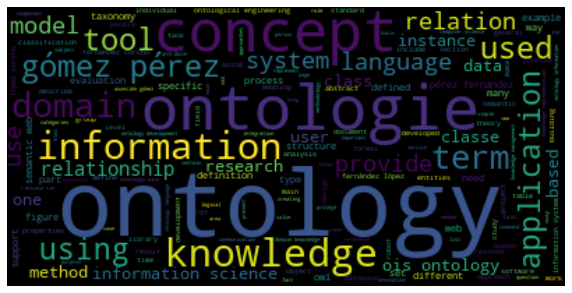

In [20]:
cleaned = []
cleaned = ' '.join(lista)
wordcloud = WordCloud().generate(cleaned)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Removendo espaços múltiplos

In [21]:
freqdist = []
cleaned_texts = raw_texts.lower()
cleaned_texts = re.sub(' +',' ', cleaned_texts) 
cleaned_texts = re.sub(r'\n\s*\n', '\n', cleaned_texts)
print('Espaços múltiplos removidos: '+str(len(raw_texts)-len(cleaned_texts)))
list_words = cleaned_texts.split()
list_words = [l.strip().lower() for l in list_words]


list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]
freqdist = Counter(list_words)

Espaços múltiplos removidos: 7609


# Contexto da palavra "Ontology"

In [29]:
expression = 'ontology'
pos = 0 
positions = []
while pos != -1:
    position = cleaned_texts.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('A expressão "'+expression+'" foi encontrada {} times. \n\n\n'.format(len(positions)))

window = 50
for position in positions[0:10]:
    print(cleaned_texts[position - window:position + window + len(expression)].strip())

A expressão "ontology" foi encontrada 2278 times. 



photography, expressive dimension, web semantics, ontology, tool of search.
introdução
o foco deste trabalh
.pdf. acesso em: 26 nov. 2006.
hyvönen, e. et al. ontology based image retrieval. 2003. disponível em:
<http
paulo, são
paulo, 2002.
schreiber, a. t. et al. ontology-based photo annotation. 2001. disponível em:
<htt
n. 2 p. 28-36, jul/dez.
1996.
styrman, a. et. al. ontology based image annotation and retrieval. 2005. dispo
ttps://www.researchgate.net/publication/336229633
ontology as a system
technical report · october 2019
doi:
e downloaded file.
technical report, sc-tr-00031
ontology as a system
joseph j. simpson, mary j. simpson
sy
, 2019
i.
introduction
human beings use the term ‘ontology’ in a wide variety of contexts and applications.
ontexts and applications. this document
addresses ontology definitions, concepts and semantics. the discussi
e subject of the system analysis, in this case an ontology, is evaluated to d

# Sintagmas 

In [130]:
from nltk.util import tokenwrap

tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned_texts)
nltk_text = nltk.Text(tokens)
nltk_text.concordance(expression.lower(), width=120, lines=10)
nltk_text.similar(expression)
print(tokenwrap(nltk_text.collocation_list(num=100, window_size=2), separator="; "))



no matches
No matches
http ://;  asunción gómez;  :// www;  information science;  semantic
web;  ois ontology;  ontological engineering;  mariano fernánde;
https ://;  oscar corcho;  artificial intelligence;  computer science;
knowledge representation;  com base;  geological data;  natural
language;  international conference;  knowledge management;
international journal;  técnica fotográfica;  conceptual model;
information systems;  life cycle;  resource ="#;  technical report;
knowledge acquisition;  ios press;  conteúdo semântico;  wolfgang
wahlster;  ontology development;  henry lieberman;  dieter fensel;
knowledge base;  information retrieval;  virtual communities;
knowledge sharing;  jim hendler;  new york;  competency questions;
mit press;  intended models;  virtual community;  owl api;  por meio;
knowledge engineering;  controlled vocabulary;  van der;  geological
time;  formal ontology;  domain knowledge;  real world;  der meer;
ontological commitment;  data interoperability;  

# Os 25 primeiros Bigramas

In [102]:
max_items = 25
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

javier gramajo
além disso
requested enhancement
bmc bioinformatics
modelagem conceitual
wolfgang wahlster
der meer
henry lieberman
 
ad hoc
dieter fensel
pode ser
jim hendler
por meio
citations reads
#" xmlns
técnica fotográfica
downloaded file
life cycle
ال ت
mariano fernánde
van der
age ”.
controlled vocabularies
hoc binary


# Os Bigramas com no mínimo 100 ocorrências

In [103]:
# de 1000 --> 100
for a, b in (finder2.above_score(bigram_measures.raw_freq, 100.0 / len(list(nltk.bigrams(tokens))))):
        print(a, b)

of the
0 0
in the
the ontology
is a
http ://
on the
to be
:// www
asunción gómez
to the
an ontology
can be
et al
such as
information science
it is
in a
ois ontology
© asunción
figure ‎
based on
for the
of a
of information
and the
as a
semantic web
ontology is
the domain
 
of ontology
of ontologies
al .,
in this
’ s
be used
ontological engineering
is an
‎ 4
with the
is the
set of


# Os 25 primeiros Trigramas

In [104]:
max_items = 100
freq_min_t = 25
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['the', 'of', 'in'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

  
  
© oscar corcho
  
© asunción gómez
recuperação de imagens
com base em
ma et al
pérez ,, m
http :// www
https :// www
international conference on
et al .,
engineering © asunción
ontological engineering ©
figure ‎ 4
figure ‎ 5
corcho ontological engineering
table ‎ 2
communities of practice
a person who
international journal of
figure ‎ 2
as well as
0 0 0
can be used
it can be
1 0 0
0 0 1
is based on
be used to
0 1 0
is a person
based on the
a set of
a number of
ois ontology is
proceedings of the
an ontology is
some of the
ontology of information
ontology is a


# Os Trigramas com no mínimo 10 ocorrências

In [105]:
for a, b, c in finder3.above_score(trigram_measures.raw_freq,10.0 / len(list(nltk.trigrams(tokens)))):
        print (a, b, c)

0 0 0
http :// www
© asunción gómez
et al .,
  
figure ‎ 4
pérez ,, m
1 0 0
0 0 1
  
0 1 0
a set of
communities of practice
based on the
© oscar corcho
can be used
international journal of
figure ‎ 5
ma et al
be used to
https :// www
ontology of information
engineering © asunción
ontological engineering ©
international conference on
table ‎ 2
recuperação de imagens
  
an ontology is
some of the
is based on
a number of
figure ‎ 2
is a person
ontology is a
proceedings of the
corcho ontological engineering
a person who
as well as
com base em
it can be
ois ontology is


# 4-Grams

In [106]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
xgrams_counter.most_common(30)

[(('0', '0', '0', '0'), 373),
 (('asunción', 'gómez', '-', 'pérez'), 227),
 (('http', '://', 'www', '.'), 183),
 (('©', 'asunción', 'gómez', '-'), 170),
 ((',', 'o', '.', 'corcho'), 157),
 (('2', '.', '1', '.'), 113),
 (('\uf052', '\uf052', '\uf052', '\uf052'), 92),
 (('gómez', '-', 'pérez', ','), 91),
 (('fernández', '-', 'lópez', ','), 86),
 (('figure', '\u200e', '4', '-'), 85),
 (('.', 'fernández', '-', 'lópez'), 80),
 (('gómez', '-', 'pérez', ',,'), 79),
 (('-', 'pérez', ',,', 'm'), 79),
 (('pérez', ',,', 'm', '.'), 79),
 ((',,', 'm', '.', 'fernández'), 79),
 (('m', '.', 'fernández', ','), 79),
 (('.', 'fernández', ',', 'o'), 79),
 (('fernández', ',', 'o', '.'), 79),
 (('-', 'pérez', ',', 'm'), 78),
 (('pérez', ',', 'm', '.'), 78),
 ((',', 'm', '.', 'fernández'), 78),
 (('m', '.', 'fernández', '-'), 78),
 (('-', 'lópez', ',', 'o'), 78),
 (('lópez', ',', 'o', '.'), 78),
 (('1', '0', '0', '0'), 58),
 (('4', '.', '2', '.'), 50),
 (('0', '0', '0', '1'), 47),
 (('.', '1', '.', '1'), 45)

# Diversidade Léxica

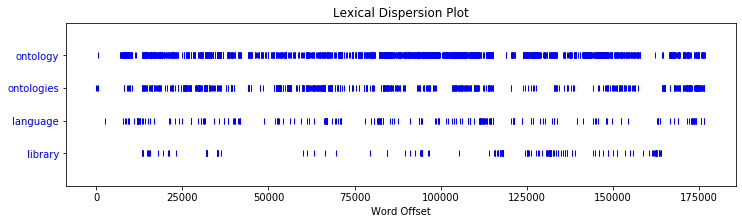

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
dispersion_words = ['ontology', 'ontologies', 'language', 'library']
nltk_text.dispersion_plot(dispersion_words)

# Os 30 termos mais frequentes

In [131]:
print(freqdist.most_common(30))

[('ontology', 2044), ('knowledge', 861), ('information', 843), ('ontologies', 710), ('domain', 486), ('science', 418), ('concepts', 342), ('web', 328), ('used', 316), ('data', 294), ('figure', 284), ('model', 264), ('ois', 260), ('language', 256), ('gómez-pérez', 255), ('class', 248), ('owl', 242), ('semantic', 240), ('using', 240), ('library', 238), ('engineering', 233), ('ontological', 228), ('corcho', 220), ('development', 218), ('terms', 218), ('relations', 217), ('system', 205), ('also', 204), ('research', 200), ('based', 194)]


# O gráfico de barras dos 30 termos mais frequentes 

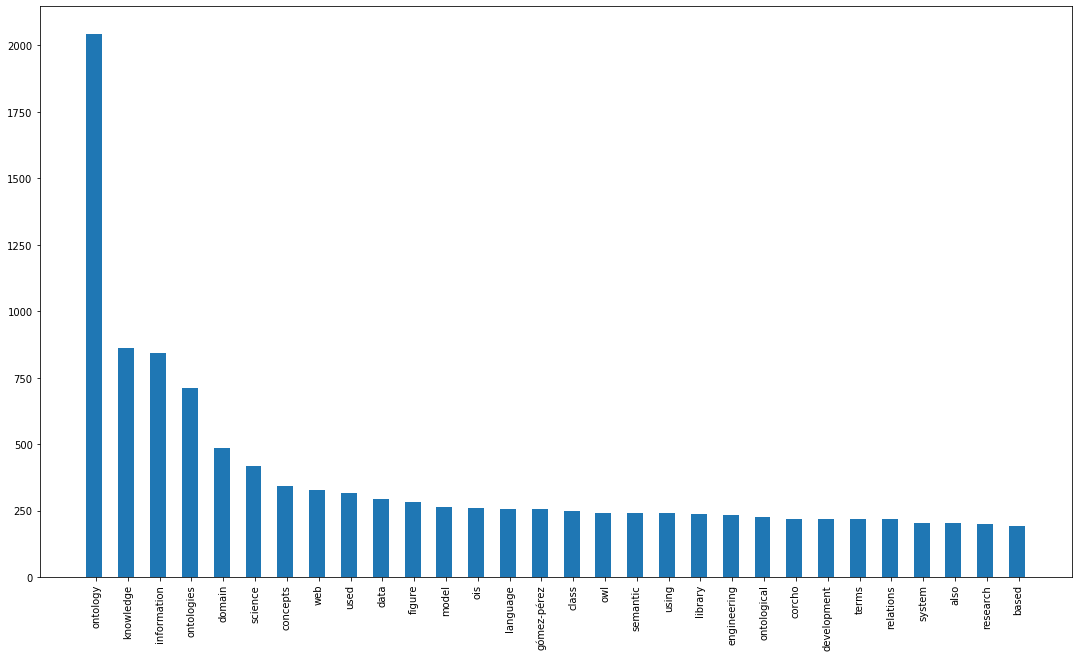

In [132]:
labels, values = zip(*freqdist.most_common(30))
indexes = np.arange(len(labels))
width = 0.5
plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.1, labels, rotation=90)
plt.show()

# O gráfico das 30 maiores ocorrências 

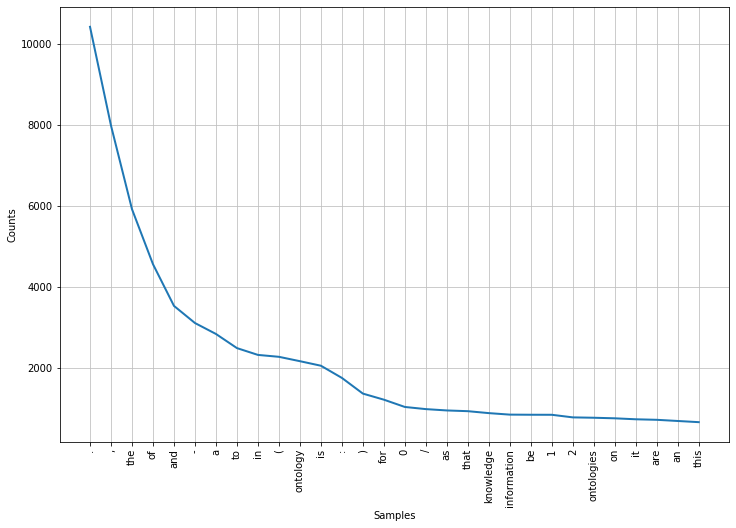

In [138]:
fd_words = nltk.FreqDist(tokens)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8));
fd_words.plot(30);

